# Singapore  Resale Flat Prices Predicting

### Problem Statement:
The resale flat market in Singapore is characterized by high competitiveness, making it challenging for individuals to accurately estimate the resale value of a flat. Numerous factors, such as location, flat type, floor area, and lease duration, contribute to the complexity of pricing. This project aims to address this challenge by developing a machine learning model capable of predicting resale prices based on historical transaction data. The goal is to provide a valuable tool for potential buyers and sellers in Singapore, helping them make informed decisions in the dynamic real estate market.

DATA SOURCE : https://beta.data.gov.sg/collections/189/datasets/d_ea9ed51da2787afaf8e51f827c304208/view

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt


## Combining Multiple CSV Files Based on Year-wise Data

In [2]:
# ## Multiple CSV files hod data with respect to year so need to combine all the files into one csv file
# csv_files = ['ResaleFlatPricesBasedonApprovalDate19901999.csv', 'ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv', 
#              'ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv', 
#              'ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv',
#              'ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv']

# # Initialize an empty DataFrame to store the combined data
# combined_data = pd.DataFrame()

# # Loop through each CSV file and append its data to the combined_data DataFrame
# for file in csv_files:
#     # Read the CSV file into a DataFrame
#     df = pd.read_csv(file)
    
#     # Concat the data to the combined_data DataFrame
#     combined_data = pd.concat([combined_data, df], ignore_index=True)

# # Save the combined data to a new CSV file
# combined_data.to_csv('combined_data.csv', index=False)

# print("Combined data saved to 'combined_data.csv'")

In [3]:
# Read the combined file for the problem solving 

df=pd.read_csv('combined_data.csv')

df.head()

C:\Users\DIVAHAR\AppData\Local\Temp\ipykernel_9236\3676961250.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('combined_data.csv')


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [4]:
df.shape

(912681, 11)

## observation:
total 11 features available out of which 10 are independent features and 1 is dependent feature(resale_price)

# Identify and handle duplicate rows in the dataset

In [5]:
# To find the duplicate rows present in the dataset 
df[df.duplicated]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
673,1990-01,GEYLANG,3 ROOM,47,CIRCUIT RD,01 TO 03,56.0,STANDARD,1969,18000.0,NaN
726,1990-01,HOUGANG,3 ROOM,308,HOUGANG AVE 5,10 TO 12,67.0,NEW GENERATION,1983,47000.0,NaN
843,1990-01,JURONG WEST,3 ROOM,145,HU CHING RD,04 TO 06,64.0,IMPROVED,1976,23400.0,NaN
854,1990-01,JURONG WEST,3 ROOM,172,BOON LAY DR,10 TO 12,70.0,IMPROVED,1974,32900.0,NaN
862,1990-01,JURONG WEST,3 ROOM,185,BOON LAY AVE,22 TO 24,59.0,IMPROVED,1975,22500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
900302,2023-09,KALLANG/WHAMPOA,3 ROOM,93,GEYLANG BAHRU,04 TO 06,68.0,New Generation,1979,420000.0,54 years 05 months
902751,2023-03,PUNGGOL,4 ROOM,232A,SUMANG LANE,16 TO 18,93.0,Model A,2018,580000.0,94 years 08 months
904411,2023-08,SEMBAWANG,4 ROOM,104D,CANBERRA ST,13 TO 15,93.0,Model A,2018,600000.0,94 years
909496,2023-04,WOODLANDS,4 ROOM,28,MARSILING DR,07 TO 09,97.0,New Generation,1977,395000.0,53 years


In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(910792, 11)

# Explore the data to understand its structure and characteristics

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910792 entries, 0 to 912680
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                910792 non-null  object 
 1   town                 910792 non-null  object 
 2   flat_type            910792 non-null  object 
 3   block                910792 non-null  object 
 4   street_name          910792 non-null  object 
 5   storey_range         910792 non-null  object 
 6   floor_area_sqm       910792 non-null  float64
 7   flat_model           910792 non-null  object 
 8   lease_commence_date  910792 non-null  int64  
 9   resale_price         910792 non-null  float64
 10  remaining_lease      203329 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 83.4+ MB


## Observation:
01) 3 numerical columns are persent in the raw data
02) 8 object data types are present,need to further explore for better understanding
03) values are missing in remaining_lease column need to look into it
04) month column represents the registration date of the property
05) block column represents the portion of the building that contains a group of flats or apartments 
06) stret name represents the road name in which the property is located
07) Lease_commence_date column represents the specific year when the lease for a property, such as a flat or apartment, officially begins.

In [9]:
df['block'].unique()

array(['309', '216', '211', ..., '462A', '462C', '462B'], dtype=object)

In [10]:
df['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2022], dtype=int64)

In [11]:
df['town'].unique()
# Different towns present in the dataset

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [12]:
df['flat_type'].unique()
# Different flat types present in the dataset

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

## Observation:
###  Correct 'MULTI-GENERATION' to 'MULTI GENERATION' for better consistency


In [13]:
df['flat_type'] = df['flat_type'].replace('MULTI-GENERATION', 'MULTI GENERATION')
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [14]:
df['storey_range'].unique()
# tells the storey in which the property is located in the building

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [15]:
df['flat_model'].unique()
# tells the different types of flat models in the dataset

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [16]:
df['remaining_lease'].unique()
#  represent the number of years remaining on the lease for the property

array([nan, 70.0, 65.0, 64.0, 63.0, 62.0, 69.0, 60.0, 61.0, 86.0, 77.0,
       80.0, 90.0, 87.0, 66.0, 58.0, 94.0, 71.0, 68.0, 84.0, 73.0, 79.0,
       76.0, 72.0, 82.0, 74.0, 67.0, 88.0, 81.0, 89.0, 53.0, 54.0, 55.0,
       57.0, 93.0, 83.0, 85.0, 92.0, 91.0, 59.0, 95.0, 52.0, 51.0, 56.0,
       75.0, 96.0, 78.0, 50.0, 97.0, '67.0', '66.0', '70.0', '71.0',
       '68.0', '81.0', '88.0', '76.0', '58.0', '53.0', '57.0', '62.0',
       '59.0', '50.0', '54.0', '56.0', '60.0', '52.0', '86.0', '69.0',
       '78.0', '80.0', '92.0', '89.0', '87.0', '61.0', '63.0', '64.0',
       '83.0', '72.0', '73.0', '82.0', '85.0', '94.0', '75.0', '77.0',
       '79.0', '65.0', '95.0', '90.0', '74.0', '91.0', '84.0', '93.0',
       '55.0', '96.0', '51.0', '49.0', '48.0', '61 years 04 months',
       '60 years 07 months', '62 years 05 months', '62 years 01 month',
       '63 years', '61 years 06 months', '58 years 04 months',
       '59 years 08 months', '59 years 06 months', '60 years',
       '62 years 0

In [17]:
# to find the missing values in the dataset
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        707463
dtype: int64

## Analyzing Missing Values Percentage in the 'remaining_lease' Column and Identifying Patterns for Imputation

In [18]:
missing_percentage = df['remaining_lease'].isnull().mean() * 100

print(f"Percentage of missing values in 'remaining_lease': {missing_percentage:.2f}%")

Percentage of missing values in 'remaining_lease': 77.68%


## Observation :
### Missing values are a very high percentage in the dataset,  droping the rows is not an option because we will have only 30% of data will be left after TO WORK WITH

In [19]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
912676,2023-05,YISHUN,EXECUTIVE,827,YISHUN ST 81,01 TO 03,154.0,Maisonette,1987,829000.0,63 years 06 months
912677,2023-05,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,855000.0,63 years 06 months
912678,2023-07,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,860000.0,63 years 07 months
912679,2023-01,YISHUN,MULTI GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,1080000.0,63 years 11 months
912680,2023-06,YISHUN,MULTI GENERATION,633,YISHUN ST 61,04 TO 06,159.0,Multi Generation,1987,935000.0,63 years 06 months


## Observation:

In the course of the analysis, a discernible pattern in the calculation of "remaining_lease" has been identified. The formula appears to be:

### remaining_lease = lease_commence_date + 99 -month(year value only for easier imputation)
#### for Evidence:
        month town flat_type block  street_name	  storey_range	floor_area_sqm flat_modellease_commence_date	 resale_price	 
912676	2023-05	YISHUN	EXECUTIVE	827	YISHUN ST 81	01 TO 03	154.0	Maisonette        	1987	            829000.0	
        remaining_lease 
        63 years 06 months

lets apply this method

remaining_lease = lease_commence_date + 99 -month(year value only for easier imputation)

remaining_lease = 1987 + 99 -2023

remaining_lease = 63 

Therefore, this pattern will be utilized to impute missing values in the "remaining_lease" column.

In [20]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
912676,2023-05,YISHUN,EXECUTIVE,827,YISHUN ST 81,01 TO 03,154.0,Maisonette,1987,829000.0,63 years 06 months
912677,2023-05,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,855000.0,63 years 06 months
912678,2023-07,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,860000.0,63 years 07 months
912679,2023-01,YISHUN,MULTI GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,1080000.0,63 years 11 months
912680,2023-06,YISHUN,MULTI GENERATION,633,YISHUN ST 61,04 TO 06,159.0,Multi Generation,1987,935000.0,63 years 06 months


In [21]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

## - Extract year and month from the 'month' column

In [22]:
df['reg_year'] = df['month'].apply(lambda x: int(x.split('-')[0]))
df['reg_month'] = df['month'].apply(lambda x: int(x.split('-')[1]))

In [23]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,1
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,1
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,1
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,1
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,1


In [24]:
df['reg_year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023], dtype=int64)

In [25]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
reg_year                 int64
reg_month                int64
dtype: object

## Method - For calculating the remaing lease column

In [26]:
df['remaining_lease_year'] = df['lease_commence_date'] + 99 - df['reg_year']

# Convert the column to int64
df['remaining_lease_year'] = df['remaining_lease_year'].astype('int64')

In [27]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month,remaining_lease_year
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,1,86
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,1,86
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,1,86
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,1,86
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,1,85


In [28]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month,remaining_lease_year
912676,2023-05,YISHUN,EXECUTIVE,827,YISHUN ST 81,01 TO 03,154.0,Maisonette,1987,829000.0,63 years 06 months,2023,5,63
912677,2023-05,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,855000.0,63 years 06 months,2023,5,63
912678,2023-07,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,860000.0,63 years 07 months,2023,7,64
912679,2023-01,YISHUN,MULTI GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,1080000.0,63 years 11 months,2023,1,63
912680,2023-06,YISHUN,MULTI GENERATION,633,YISHUN ST 61,04 TO 06,159.0,Multi Generation,1987,935000.0,63 years 06 months,2023,6,63


In [29]:
df.isnull().sum()

month                        0
town                         0
flat_type                    0
block                        0
street_name                  0
storey_range                 0
floor_area_sqm               0
flat_model                   0
lease_commence_date          0
resale_price                 0
remaining_lease         707463
reg_year                     0
reg_month                    0
remaining_lease_year         0
dtype: int64

In [30]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,910792.0,95.723532,25.851131,28.0,73.0,93.0,113.0,307.0
lease_commence_date,910792.0,1988.122420,10.496756,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,910792.0,316584.929387,166755.342397,5000.0,191000.0,294000.0,411000.0,1500000.0
reg_year,910792.0,2005.892757,9.122495,1990.0,1998.0,2005.0,2013.0,2023.0
reg_month,910792.0,6.581314,3.401311,1.0,4.0,7.0,10.0,12.0
remaining_lease_year,910792.0,81.229663,10.582884,42.0,74.0,83.0,90.0,101.0


In [31]:
filtered_df = df[df['remaining_lease_year'] > 99]
filtered_df.shape

(51, 14)

In [32]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month,remaining_lease_year
912676,2023-05,YISHUN,EXECUTIVE,827,YISHUN ST 81,01 TO 03,154.0,Maisonette,1987,829000.0,63 years 06 months,2023,5,63
912677,2023-05,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,855000.0,63 years 06 months,2023,5,63
912678,2023-07,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,860000.0,63 years 07 months,2023,7,64
912679,2023-01,YISHUN,MULTI GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,1080000.0,63 years 11 months,2023,1,63
912680,2023-06,YISHUN,MULTI GENERATION,633,YISHUN ST 61,04 TO 06,159.0,Multi Generation,1987,935000.0,63 years 06 months,2023,6,63


In [33]:
filtered_df1 = df[df['remaining_lease_year'] > 99]
filtered_df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month,remaining_lease_year
23271,1991-11,BISHAN,4 ROOM,227,BISHAN ST 23,04 TO 06,103.0,MODEL A,1992,135000.0,NaN,1991,11,100
34246,1992-08,TAMPINES,5 ROOM,476,TAMPINES ST 44,04 TO 06,132.0,MODEL A,1993,200000.0,NaN,1992,8,100
46535,1993-06,WOODLANDS,5 ROOM,321,WOODLANDS ST 32,01 TO 03,127.0,IMPROVED,1994,145000.0,NaN,1993,6,100
69033,1994-05,CHOA CHU KANG,EXECUTIVE,528,CHOA CHU KANG ST 51,07 TO 09,153.0,APARTMENT,1995,350000.0,NaN,1994,5,100
69609,1994-05,PASIR RIS,4 ROOM,631,PASIR RIS DR 3,10 TO 12,104.0,MODEL A,1995,160000.0,NaN,1994,5,100
69977,1994-05,TAMPINES,EXECUTIVE,332,TAMPINES ST 32,04 TO 06,147.0,APARTMENT,1996,356000.0,NaN,1994,5,101
71709,1994-06,PASIR RIS,4 ROOM,143,PASIR RIS ST 11,04 TO 06,105.0,MODEL A,1995,180000.0,NaN,1994,6,100
76424,1994-08,WOODLANDS,EXECUTIVE,136,MARSILING RD,01 TO 03,173.0,APARTMENT,1995,330000.0,NaN,1994,8,100
77301,1994-09,CHOA CHU KANG,5 ROOM,503,CHOA CHU KANG ST 51,13 TO 15,127.0,IMPROVED,1995,235000.0,NaN,1994,9,100
77902,1994-09,QUEENSTOWN,EXECUTIVE,150,MEI LING ST,10 TO 12,142.0,APARTMENT,1995,532000.0,NaN,1994,9,100


In [34]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price,reg_year,reg_month,remaining_lease_year
count,910792.000000,910792.000000,9.107920e+05,910792.000000,910792.000000,910792.000000
mean,95.723532,1988.122420,3.165849e+05,2005.892757,6.581314,81.229663
std,25.851131,10.496756,1.667553e+05,9.122495,3.401311,10.582884
min,28.000000,1966.000000,5.000000e+03,1990.000000,1.000000,42.000000
25%,73.000000,1981.000000,1.910000e+05,1998.000000,4.000000,74.000000
50%,93.000000,1986.000000,2.940000e+05,2005.000000,7.000000,83.000000
75%,113.000000,1996.000000,4.110000e+05,2013.000000,10.000000,90.000000
max,307.000000,2022.000000,1.500000e+06,2023.000000,12.000000,101.000000


In [35]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'reg_year', 'reg_month', 'remaining_lease_year'],
      dtype='object')

## Selecting the columns which we are going to use for further process

In [36]:
selected_columns = ['town', 'flat_type', 'block', 'street_name', 'storey_range',
                    'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
                    'reg_year', 'remaining_lease_year']

# Create a new DataFrame with selected columns
df1 = df[selected_columns]


In [37]:
df1.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,reg_year,remaining_lease_year
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,86
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,86
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,86
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,86
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,85


# Outlier Detection and Treatment

## - Use box plots, histograms and Q-Q Plot to detect outliers
## - Apply Z-score and IQR methods for outlier detection
## - Remove or transform outliers to improve the distribution of the target variable

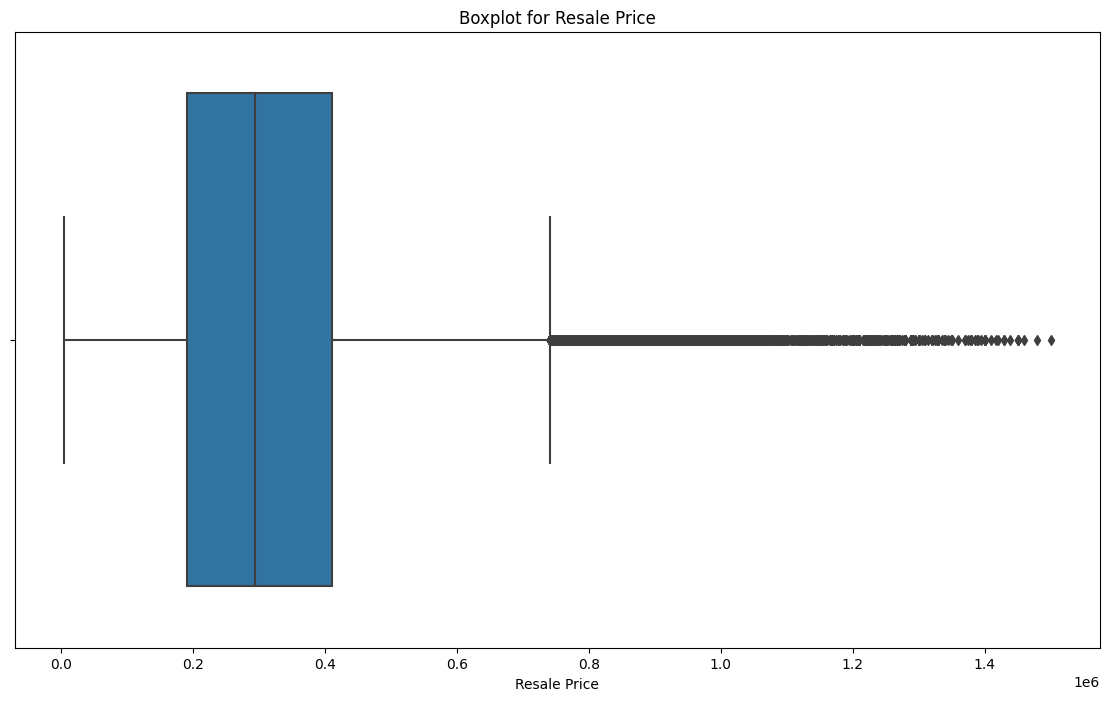

In [38]:
# Outlier Detection using Box Plot method
plt.figure(figsize=(14, 8))
sns.boxplot(x='resale_price', data=df1)
plt.title('Boxplot for Resale Price')
plt.xlabel('Resale Price')
plt.show()


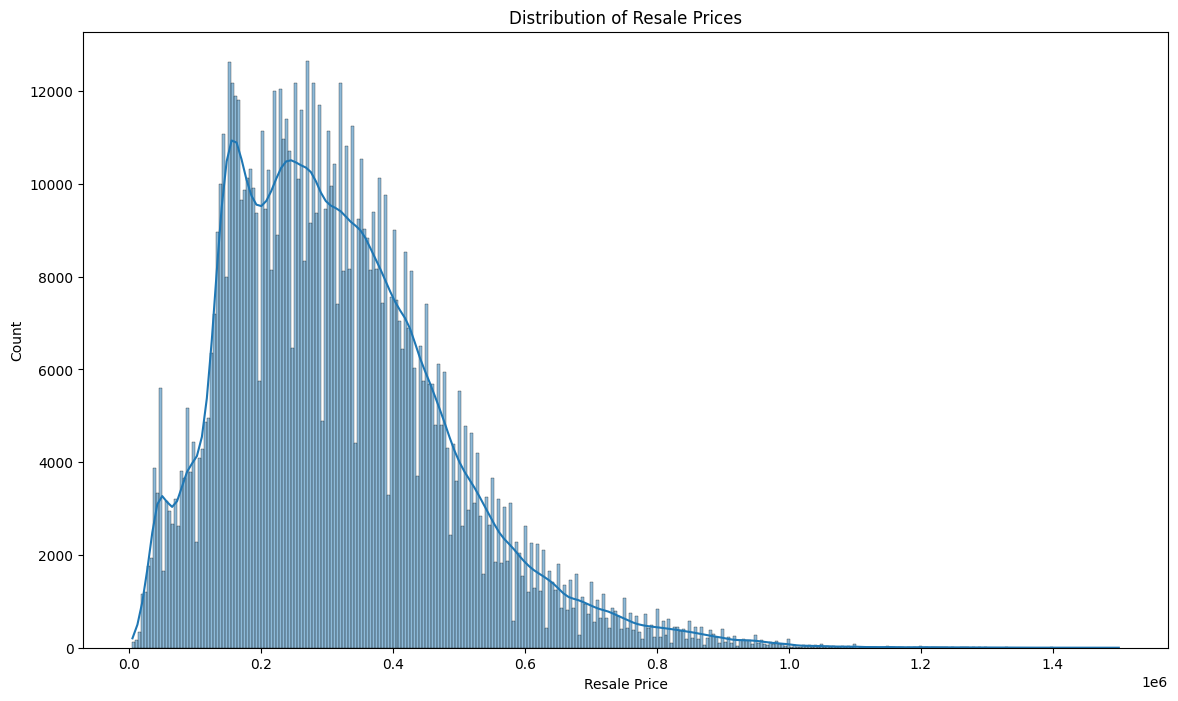

In [39]:
# Distribution Analysis for finding the oultliers
plt.figure(figsize=(14, 8))
sns.histplot(df1['resale_price'], kde=True)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.show()


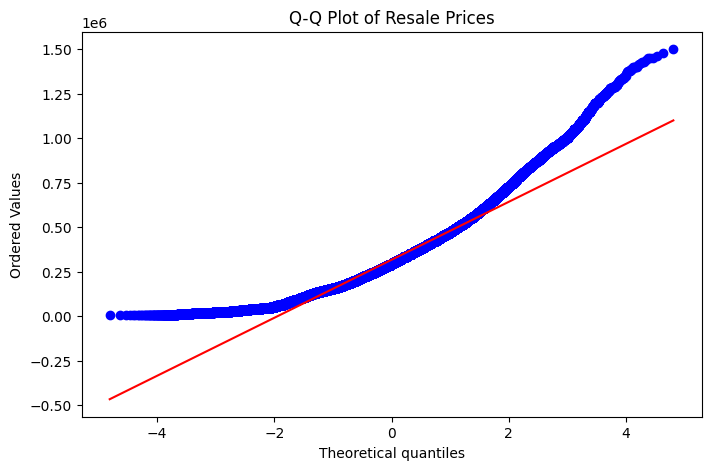

In [40]:
# Q-Q plot
from scipy.stats import probplot
plt.figure(figsize=(8, 5))
probplot(df1['resale_price'], plot=plt)
plt.title('Q-Q Plot of Resale Prices')
plt.show()

## Observation:
Since Resale price is the target variable considering only it for outlier detection and treatment 
frorm the above three charts we can definetly say that outliers are present in the dataset that are affecting the distribution and need to be taken care of

###  Outlier Detection using Z Score of resale price 

In [41]:
from scipy.stats import zscore

# Calculate Z-scores for a specific variable
z_scores = zscore(df1['resale_price'])

# Identify outliers
outliers = (np.abs(z_scores) > 3)

# Count the number of rows with outliers
num_outliers = outliers.sum()
print(f"Number of rows with outliers: {num_outliers}")

Number of rows with outliers: 10237


###  Outlier Detection using IQR of resale price 

In [42]:
# Calculate IQR for a specific variable
Q1 = df1['resale_price'].quantile(0.25)
Q3 = df1['resale_price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers1 = ((df1['resale_price'] < Q1 - 1.5 * IQR) | (df1['resale_price'] > Q3 + 1.5 * IQR))

# Count the number of rows with outliers
num_outliers1 = outliers1.sum()
print(f"Number of rows with outliers: {num_outliers1}")


Number of rows with outliers: 18389


In [43]:
df1.shape

(910792, 11)

### Percentage of outliers with Z score method

In [44]:
total_rows = df1.shape[0]
number_of_outliers = 10237

percentage_outliers = (number_of_outliers / total_rows) * 100
print(f"Percentage of rows with outliers: {percentage_outliers:.2f}%")


Percentage of rows with outliers: 1.12%


### Percentage of outliers with IQR method

In [45]:
total_rows = df1.shape[0]
number_of_outliers = 18389

percentage_outliers = (number_of_outliers / total_rows) * 100
print(f"Percentage of rows with outliers: {percentage_outliers:.2f}%")


Percentage of rows with outliers: 2.02%


## Observation:
IQR shows a higher percentage of outliers in the dataset , so higher the better taking IQR method for removal of outliers in the dataset

In [46]:
df1_no_outliers = df1[~outliers1]

# Display the shape of the DataFrame after removal
print("Shape of DataFrame after removing outliers:", df1_no_outliers.shape)

Shape of DataFrame after removing outliers: (892403, 11)


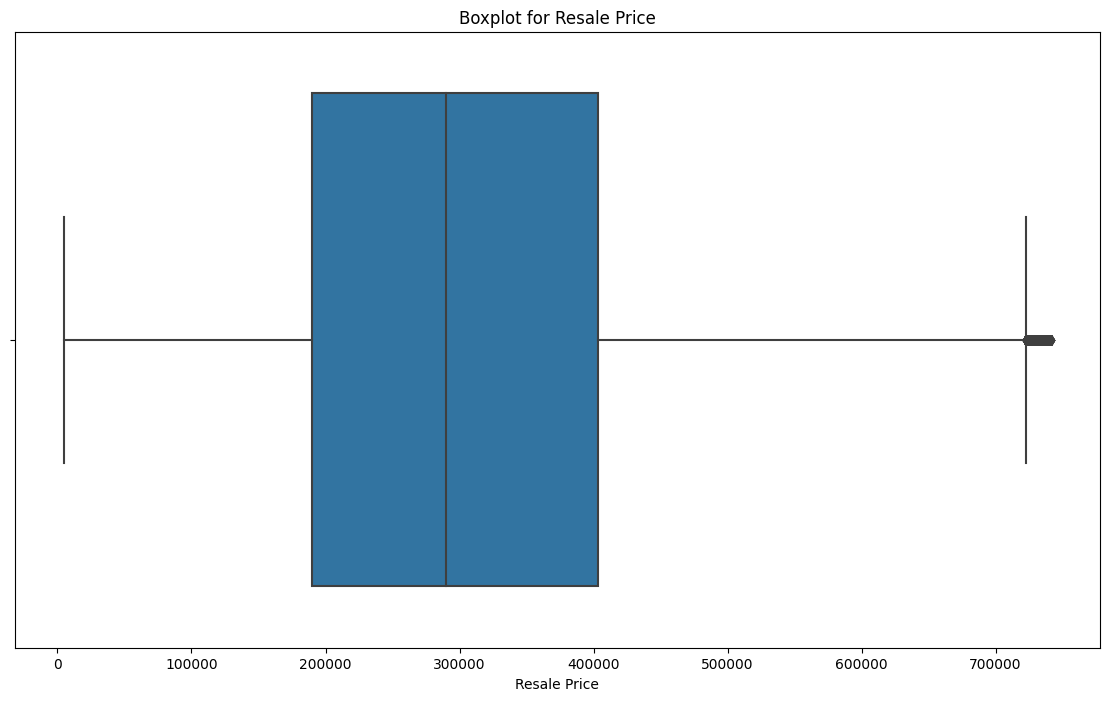

In [47]:
# Outlier Detection after IQR method
plt.figure(figsize=(14, 8))
sns.boxplot(x='resale_price', data=df1_no_outliers)
plt.title('Boxplot for Resale Price')
plt.xlabel('Resale Price')
plt.show()


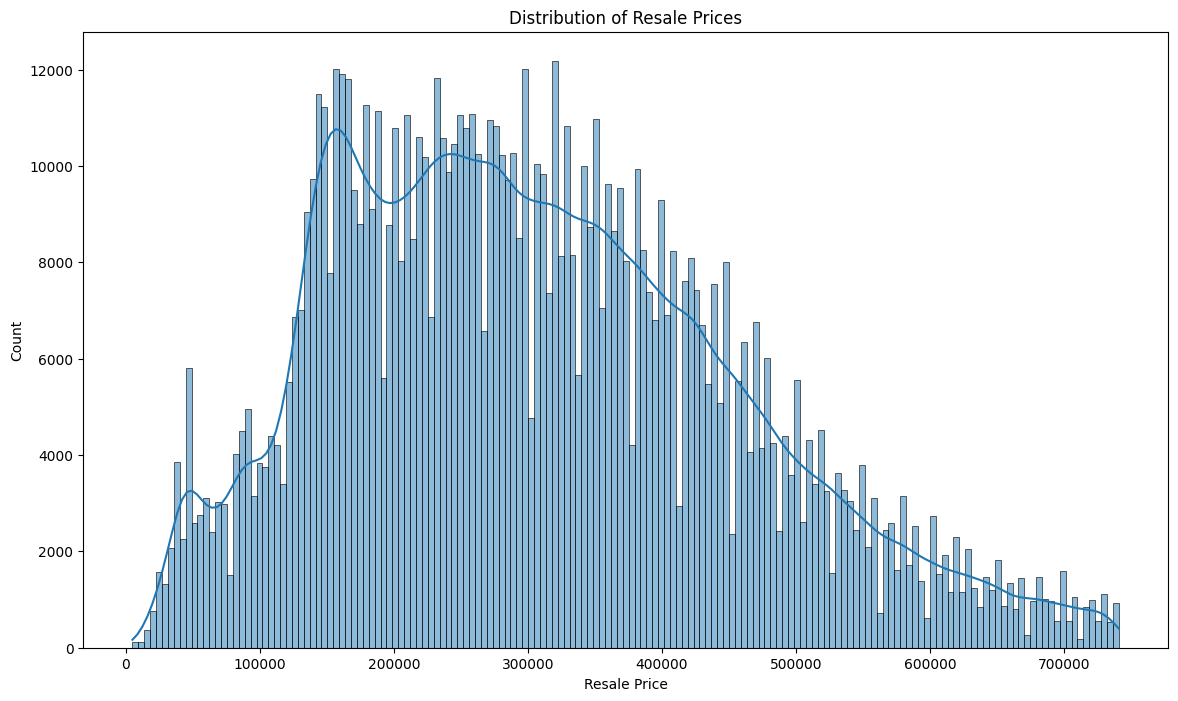

In [48]:
# Distribution Analysis after outlier treatment
plt.figure(figsize=(14, 8))
sns.histplot(df1_no_outliers['resale_price'], kde=True)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.show()


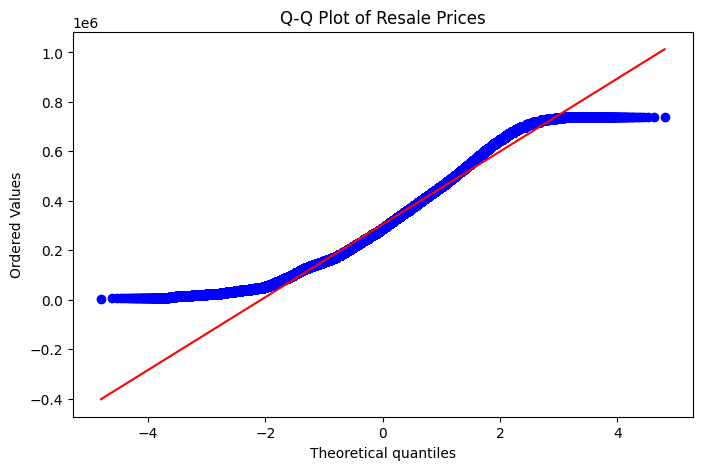

In [49]:
# Q-Q plot
from scipy.stats import probplot
plt.figure(figsize=(8, 5))
probplot(df1_no_outliers['resale_price'], plot=plt)
plt.title('Q-Q Plot of Resale Prices')
plt.show()

## Obseration:
after the treatment of outliers we can say that the resale price column is normally distributed

# Exploratory Data Analysis (EDA)
### - Visualize data distribution, outliers, and trends
### - Explore the relationships between variables using plots and charts


In [50]:
df1_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892403 entries, 0 to 912674
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   town                  892403 non-null  object 
 1   flat_type             892403 non-null  object 
 2   block                 892403 non-null  object 
 3   street_name           892403 non-null  object 
 4   storey_range          892403 non-null  object 
 5   floor_area_sqm        892403 non-null  float64
 6   flat_model            892403 non-null  object 
 7   lease_commence_date   892403 non-null  int64  
 8   resale_price          892403 non-null  float64
 9   reg_year              892403 non-null  int64  
 10  remaining_lease_year  892403 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 81.7+ MB


In [51]:
df1_no_outliers.isnull().sum()

town                    0
flat_type               0
block                   0
street_name             0
storey_range            0
floor_area_sqm          0
flat_model              0
lease_commence_date     0
resale_price            0
reg_year                0
remaining_lease_year    0
dtype: int64

In [52]:
df1_no_outliers.describe()

,floor_area_sqm,lease_commence_date,resale_price,reg_year,remaining_lease_year
count,892403.000000,892403.000000,892403.000000,892403.000000,892403.000000
mean,95.233549,1987.866844,305562.863461,2005.613152,81.253691
std,25.665225,10.295028,148886.831797,8.989116,10.544051
min,28.000000,1966.000000,5000.000000,1990.000000,42.000000
25%,73.000000,1980.000000,190000.000000,1998.000000,75.000000
50%,93.000000,1986.000000,290000.000000,2004.000000,83.000000
75%,112.000000,1995.000000,403000.000000,2012.000000,90.000000
max,307.000000,2020.000000,741000.000000,2023.000000,101.000000


# Observation:

### floor_area_sqm:

- The floor area of the properties in the dataset ranges from 28 to 307 square meters, with an average of approximately 95.72 square meters.
- The majority of properties have a floor area between 73 and 113 square meters, as indicated by the interquartile range (IQR).

### lease_commence_date:

- The dataset includes properties with lease commencement dates ranging from January 1, 1966, to January 1, 2022.
- The mean lease commencement date is around February 15, 1988.
- The median lease commencement date is on or before January 1, 1986.

### resale_price:

- Resale prices vary widely, with a minimum of $5,000 and a maximum of $1,500,000.
- The average resale price is approximately $316,585.
- The majority of resale prices fall within the range of $191,000 to $411,000, as indicated by the IQR.

### reg_year:

- The registration years of the properties range from 1990 to 2023 (33 Years of data).
- The average registration year is approximately 2005.89.
- The median registration year is 2005.

### remaining_lease_year:

- Remaining lease years vary from 42 to 101 years, with an average of approximately 81.23 years.
- The majority of properties have a remaining lease of 74 to 90 years, as indicated by the IQR.


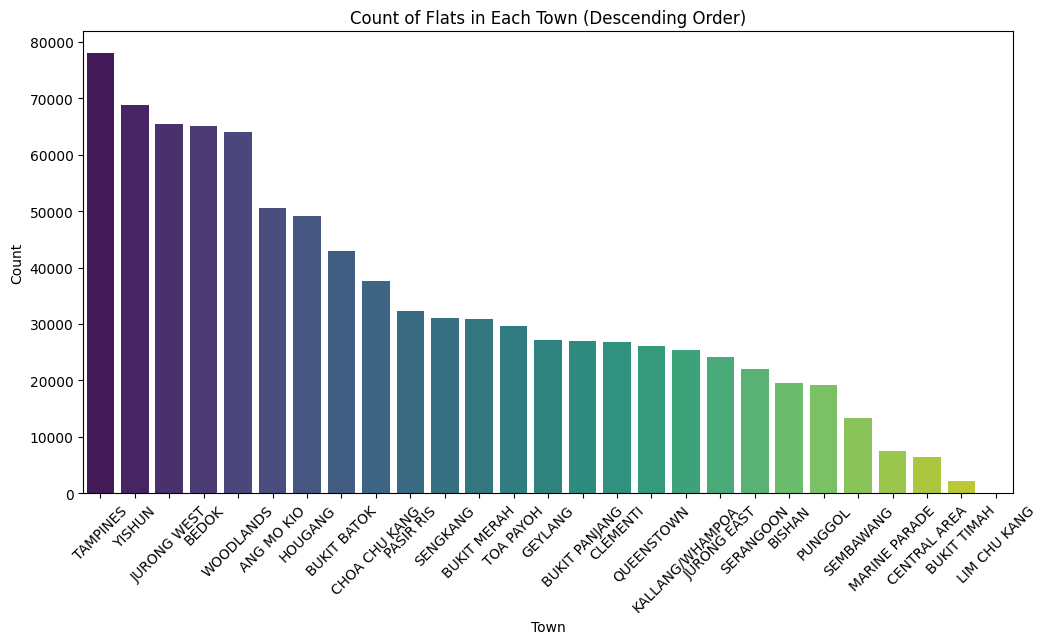

In [53]:
# Order towns based on count in descending order
town_order = df1_no_outliers['town'].value_counts().index

# Bar plot for town
plt.figure(figsize=(12, 6))
sns.countplot(x='town', data=df1_no_outliers, palette='viridis', order=town_order)
plt.title('Count of Flats in Each Town (Descending Order)')
plt.xlabel('Town')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

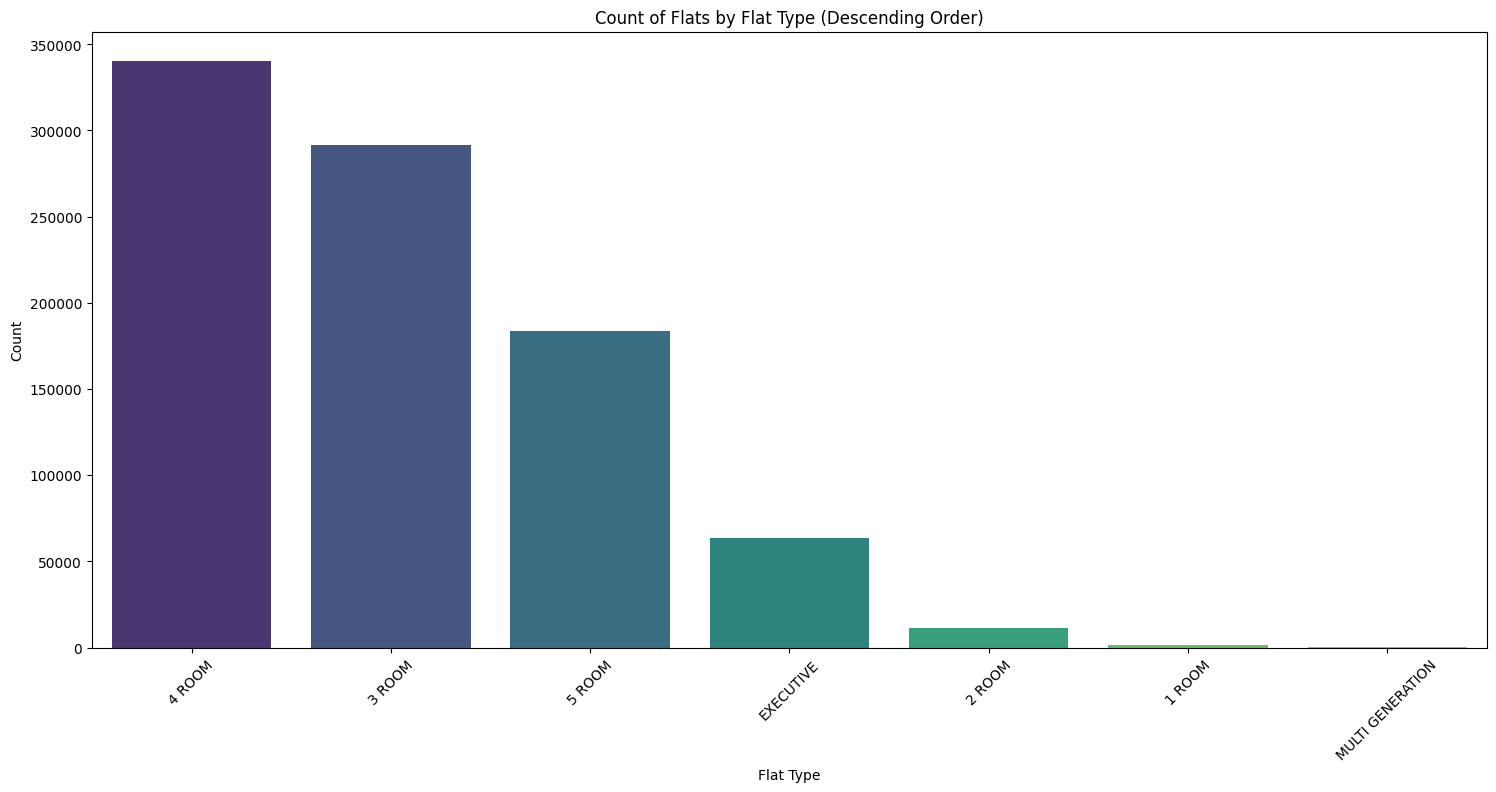

In [54]:
# Order flat types based on count in descending order
flat_type_order = df1_no_outliers['flat_type'].value_counts().index

# Bar plot for flat_type
plt.figure(figsize=(18, 8))
sns.countplot(x='flat_type', data=df1_no_outliers, palette='viridis', order=flat_type_order)
plt.title('Count of Flats by Flat Type (Descending Order)')
plt.xlabel('Flat Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Observation:

The dataset reveals that 4-room flat types are the most prevalent, while multi-generation types are the least represented.


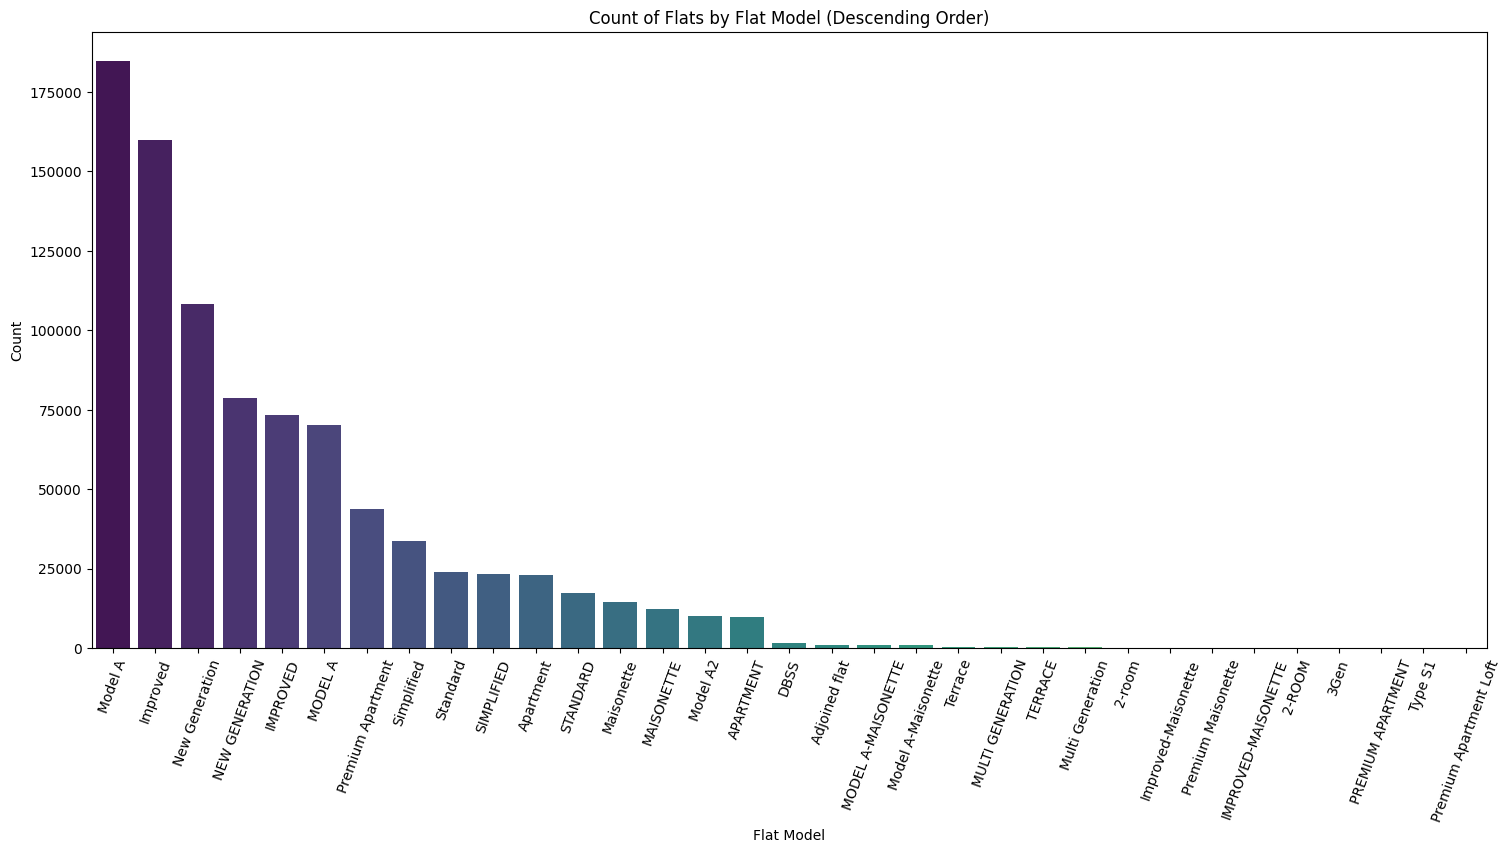

In [55]:
# Order flat models based on count in descending order
flat_model_order = df1_no_outliers['flat_model'].value_counts().index

# Bar plot for flat_model
plt.figure(figsize=(18, 8))
sns.countplot(x='flat_model', data=df1_no_outliers, palette='viridis', order=flat_model_order)
plt.title('Count of Flats by Flat Model (Descending Order)')
plt.xlabel('Flat Model')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

## Observation:

The dataset reveals that Model A  flat model  are the most prevalent, while premium apartment loft to premium apartment types are the least represented.


C:\Users\DIVAHAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


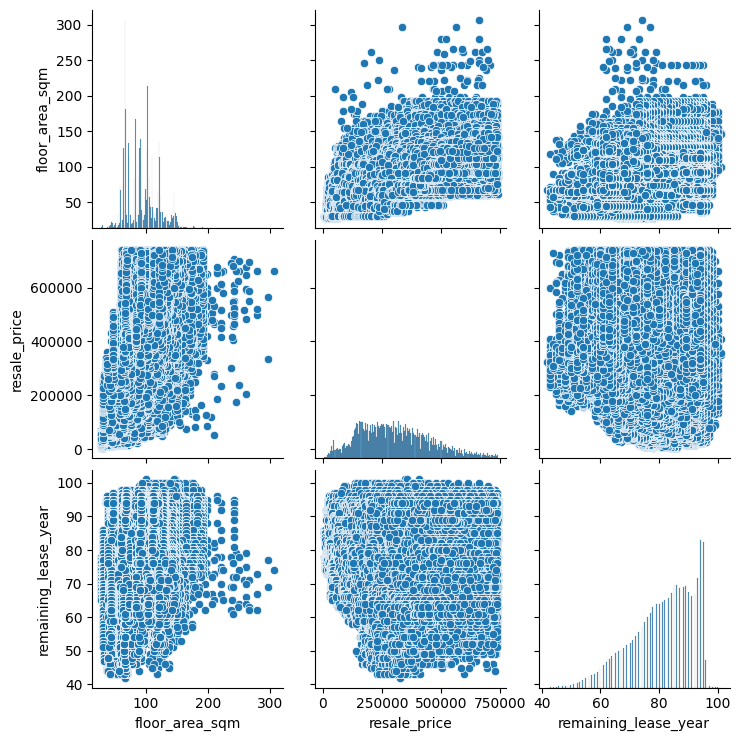

In [56]:
# Pair plot for numerical variables
sns.pairplot(df1_no_outliers[['floor_area_sqm', 'resale_price', 'remaining_lease_year']])
plt.show()

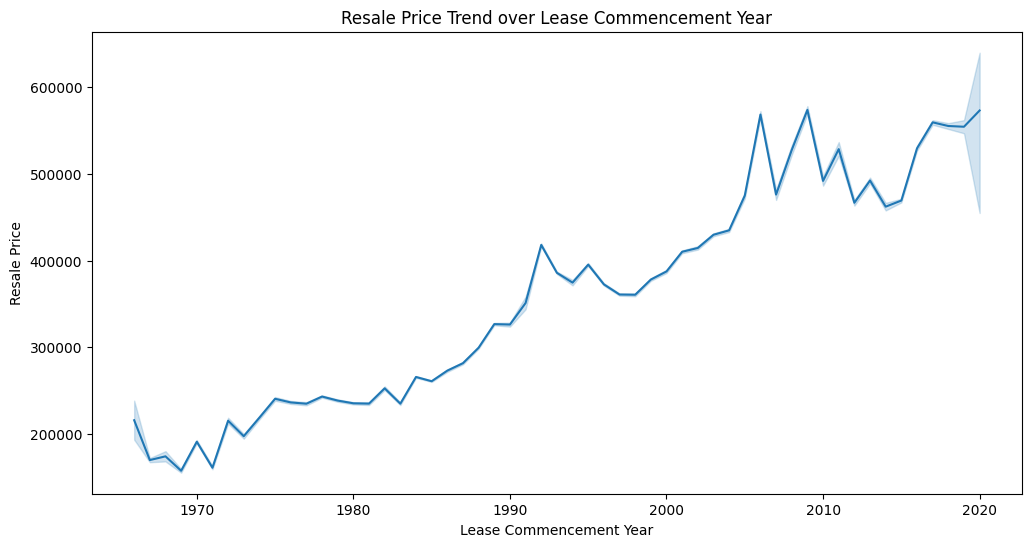

In [57]:
# Line plot for resale_price over lease_commence_date
plt.figure(figsize=(12, 6))
sns.lineplot(x='lease_commence_date', y='resale_price', data=df1_no_outliers)
plt.title('Resale Price Trend over Lease Commencement Year')
plt.xlabel('Lease Commencement Year')
plt.ylabel('Resale Price')
plt.show()


## observation:
The resale price exhibits a positive correlation with the lease commencement year, indicating a consistent upward trend over the years in the dataset.

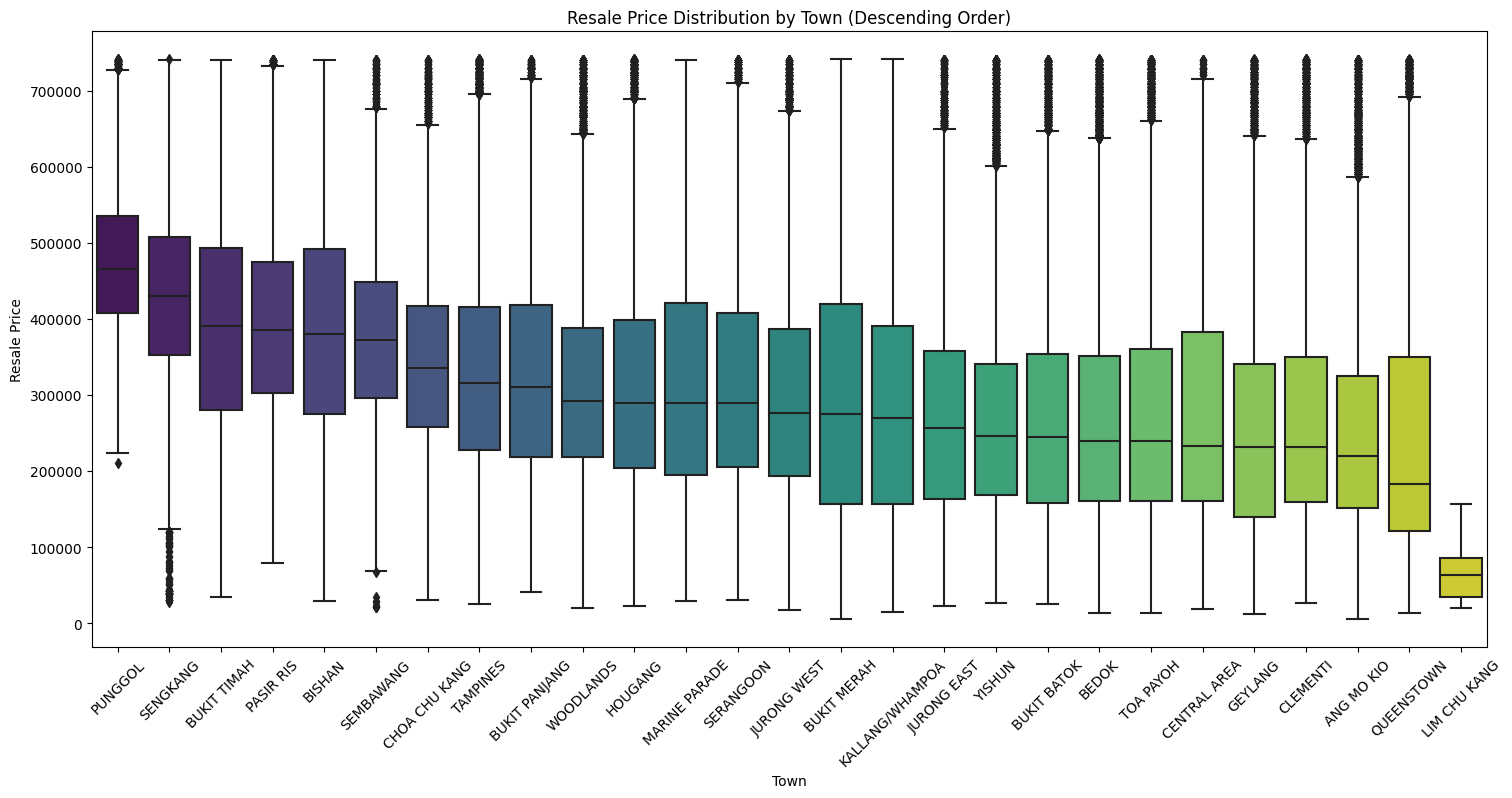

In [58]:
# Sort towns based on median resale_price
town_order = df1_no_outliers.groupby('town')['resale_price'].median().sort_values(ascending=False).index

# Box plot for town vs. resale_price
plt.figure(figsize=(18, 8))
sns.boxplot(x='town', y='resale_price', data=df1_no_outliers, palette='viridis', order=town_order)
plt.title('Resale Price Distribution by Town (Descending Order)')
plt.xlabel('Town')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)
plt.show()


## observation:
With respect to each town there is a slight difference in the resale price of the property

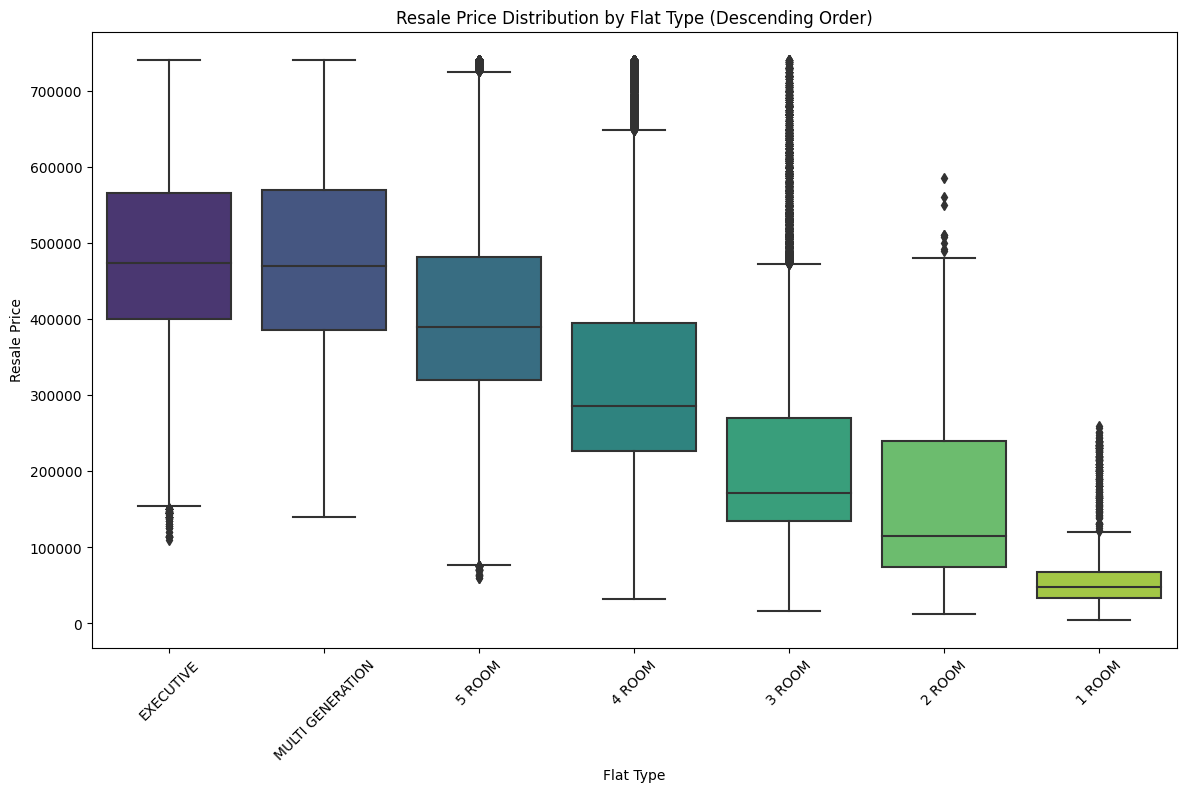

In [59]:
# Sort flat types based on median resale_price
flat_type_order = df1_no_outliers.groupby('flat_type')['resale_price'].median().sort_values(ascending=False).index

# Box plot for flat_type vs. resale_price
plt.figure(figsize=(14, 8))
sns.boxplot(x='flat_type', y='resale_price', data=df1_no_outliers, palette='viridis', order=flat_type_order)
plt.title('Resale Price Distribution by Flat Type (Descending Order)')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)
plt.show()


## Observation:
previously 4 Room flat type was found to be most commonly found and has a mid level impact in the resale value of the property ,where as Exective type was least found has a higher impact on the resale price of the propety

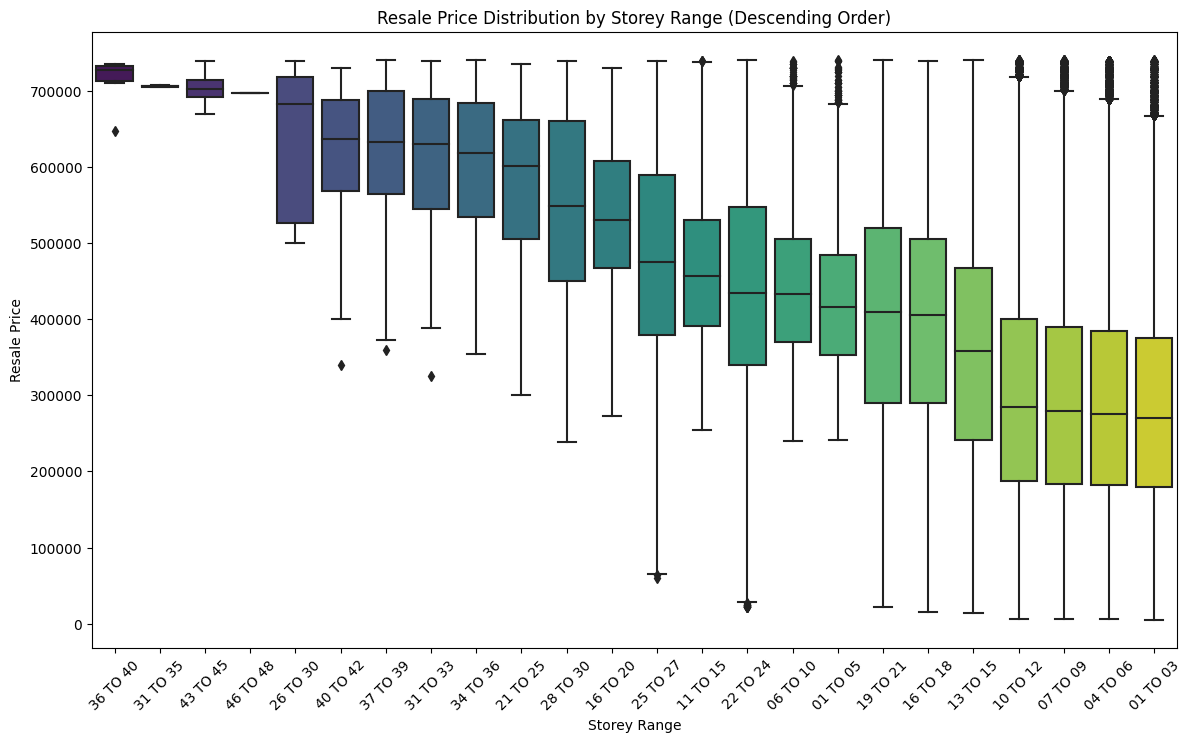

In [60]:
# Sort storey ranges based on median resale_price
storey_range_order = df1_no_outliers.groupby('storey_range')['resale_price'].median().sort_values(ascending=False).index

# Box plot for storey_range vs. resale_price
plt.figure(figsize=(14, 8))
sns.boxplot(x='storey_range', y='resale_price', data=df1_no_outliers, palette='viridis', order=storey_range_order)
plt.title('Resale Price Distribution by Storey Range (Descending Order)')
plt.xlabel('Storey Range')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)
plt.show()


## Observation:
The storey level of a property unequivocally influences its resale value, demonstrating a clear positive correlation — the higher the storey range, the greater the resale value of the property.

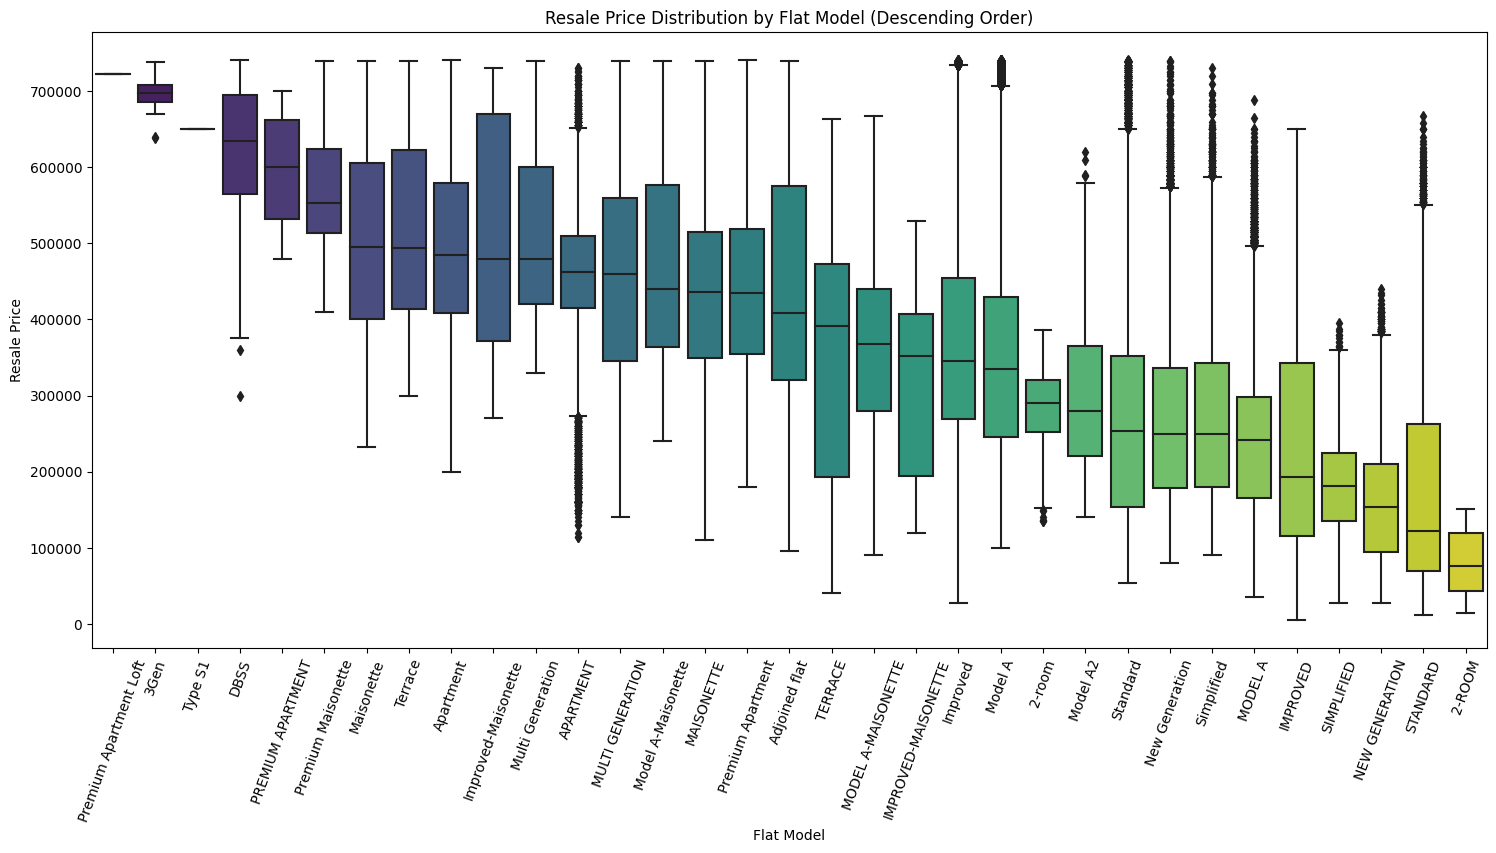

In [61]:
# Sort flat models based on median resale_price
flat_model_order = df1_no_outliers.groupby('flat_model')['resale_price'].median().sort_values(ascending=False).index

# Box plot for flat_model vs. resale_price
plt.figure(figsize=(18, 8))
sns.boxplot(x='flat_model', y='resale_price', data=df1_no_outliers, palette='viridis', order=flat_model_order)
plt.title('Resale Price Distribution by Flat Model (Descending Order)')
plt.xlabel('Flat Model')
plt.ylabel('Resale Price')
plt.xticks(rotation=70)
plt.show()


## Observation:
The flat model notably influences the resale price of the property, with premium apartment loft exhibiting a higher resale value, while 2-room flats tend to have a lower resale value.

C:\Users\DIVAHAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

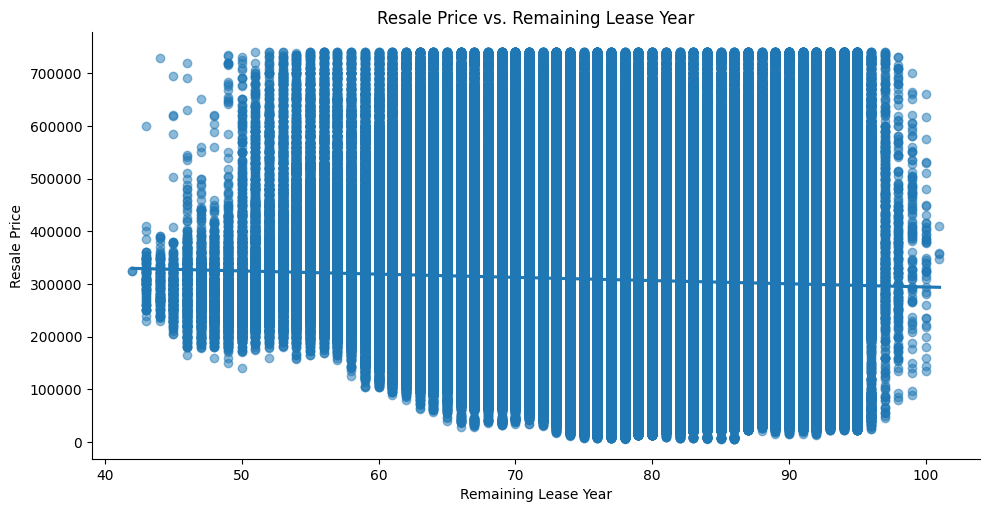

In [62]:
# Regression plot for remaining_lease_year vs. resale_price
plt.figure(figsize=(12, 8))
sns.lmplot(x='remaining_lease_year', y='resale_price', data=df1_no_outliers, scatter_kws={'alpha':0.5}, aspect=2)
plt.title('Resale Price vs. Remaining Lease Year')
plt.xlabel('Remaining Lease Year')
plt.ylabel('Resale Price')
plt.show()


## Observation :
the above plot indicating that properties with a longer remaining lease tend to command higher resale prices. This suggests that the remaining lease year is a significant factor influencing the resale value of properties, with a longer lease contributing to a more favorable market valuation.

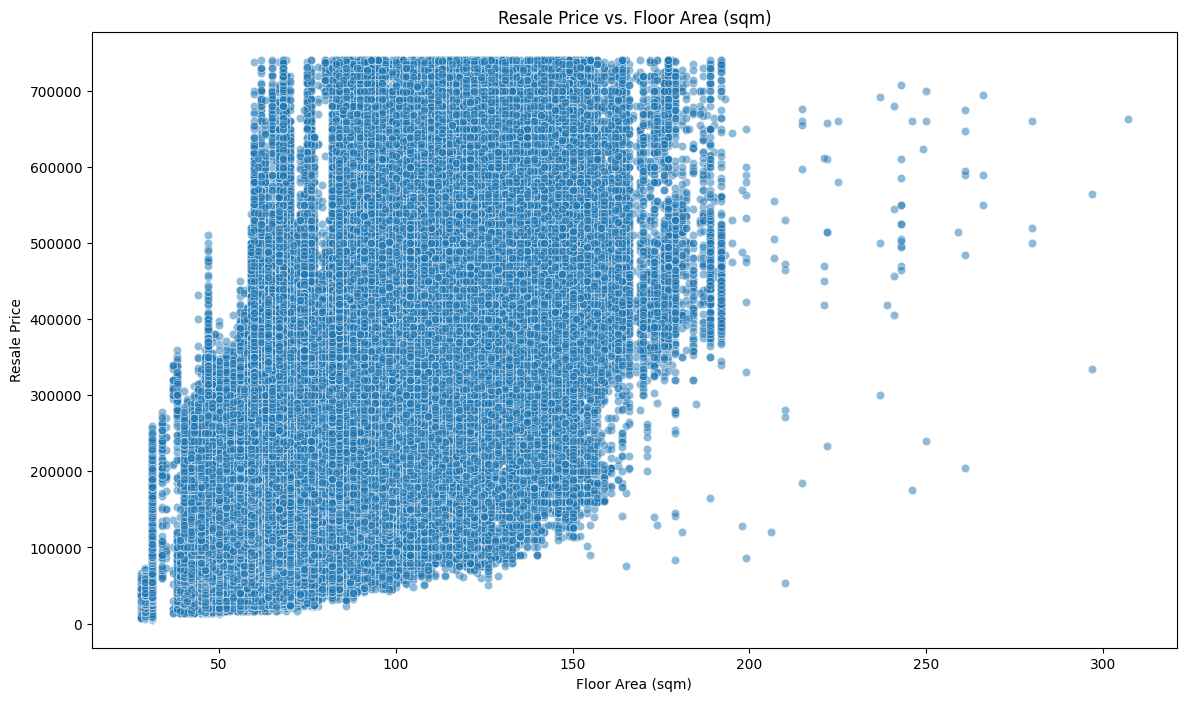

In [63]:
# Scatter plot for floor_area_sqm vs. resale_price
plt.figure(figsize=(14, 8))
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=df1_no_outliers, alpha=0.5)
plt.title('Resale Price vs. Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.show()

                      floor_area_sqm  lease_commence_date  resale_price  \
floor_area_sqm              1.000000             0.407645      0.588710   
lease_commence_date         0.407645             1.000000      0.528584   
resale_price                0.588710             0.528584      1.000000   
reg_year                    0.039844             0.408538      0.656013   
remaining_lease_year        0.364050             0.628092     -0.043169   

                      reg_year  remaining_lease_year  
floor_area_sqm        0.039844              0.364050  
lease_commence_date   0.408538              0.628092  
resale_price          0.656013             -0.043169  
reg_year              1.000000             -0.453640  
remaining_lease_year -0.453640              1.000000  


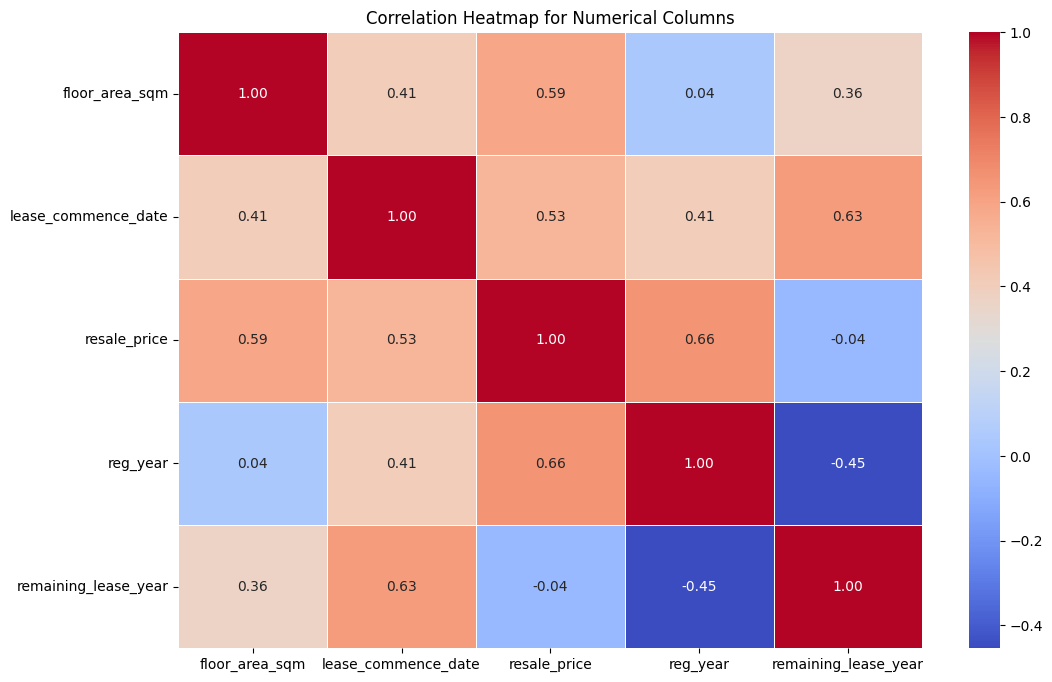

In [64]:
# Select numerical columns for correlation analysis
numerical_columns = df1_no_outliers.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numerical columns
correlation_matrix = df1_no_outliers[numerical_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()


## Observation :
Observations based on the correlation matrix:

1. Positive Correlations:
   - There is a positive correlation between `floor_area_sqm` and both `lease_commence_date` (0.41) and `resale_price` (0.59).
   - The correlation between `lease_commence_date` and `resale_price` is also positive (0.53).

2. Strong Correlation with Resale Price:
   - `resale_price` has a relatively strong positive correlation with both `floor_area_sqm` (0.59) and `lease_commence_date` (0.53).

3. Negative Correlations:
   - There is a weak negative correlation between `resale_price` and `remaining_lease_year` (-0.04).

4. Moderate Correlation with Registration Year:
   - `reg_year` has a moderate positive correlation with `resale_price` (0.66).

5. Negative Correlation with Remaining Lease Years:
   - There is a moderate negative correlation between `reg_year` and `remaining_lease_year` (-0.45).

6. Consideration for Multicollinearity:
   - The moderate to strong correlations between some features may indicate multicollinearity.

# Feature Engineering
### - Create new features such as 'reg_year', 'remaining_lease_year', 'lease_remain_years_2023', 'age_of_flat', 'price_per_sqm', etc.
### - Encode categorical variables using LabelEncoder or custom mappings
### - Scale numerical features using StandardScaler

In [65]:
df1_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892403 entries, 0 to 912674
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   town                  892403 non-null  object 
 1   flat_type             892403 non-null  object 
 2   block                 892403 non-null  object 
 3   street_name           892403 non-null  object 
 4   storey_range          892403 non-null  object 
 5   floor_area_sqm        892403 non-null  float64
 6   flat_model            892403 non-null  object 
 7   lease_commence_date   892403 non-null  int64  
 8   resale_price          892403 non-null  float64
 9   reg_year              892403 non-null  int64  
 10  remaining_lease_year  892403 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 81.7+ MB


### Need to create the remaing lease year with respect to current year 2023

In [66]:
df1_no_outliers['lease_remain_years_2023'] = 99 - (2023 - df['lease_commence_date'])


C:\Users\DIVAHAR\AppData\Local\Temp\ipykernel_9236\3168888427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_no_outliers['lease_remain_years_2023'] = 99 - (2023 - df['lease_commence_date'])


In [67]:
df1_no_outliers.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,reg_year,remaining_lease_year,lease_remain_years_2023
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,86,53
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,86,53
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,86,53
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,86,53
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,85,52


C:\Users\DIVAHAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

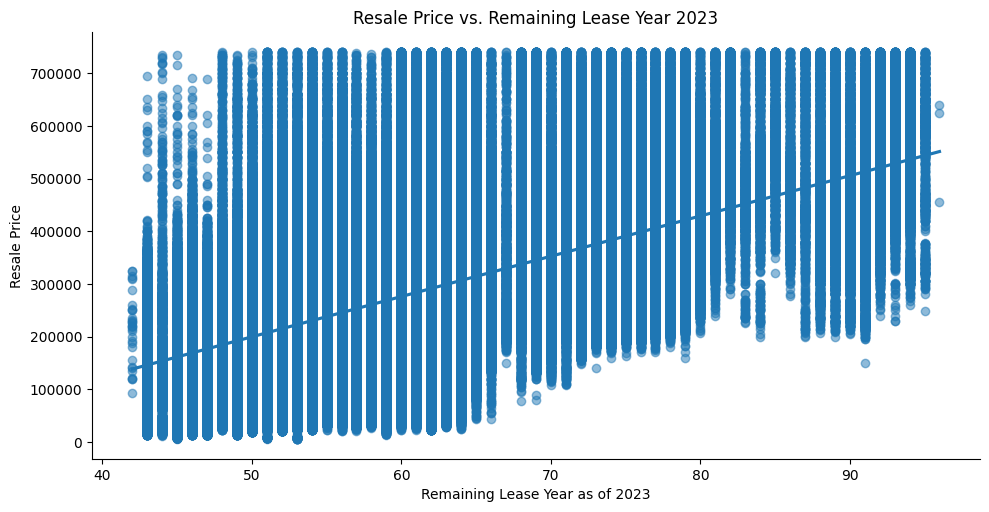

In [68]:
# Regression plot for lease_remain_years_2023 vs. resale_price
plt.figure(figsize=(12, 8))
sns.lmplot(x='lease_remain_years_2023', y='resale_price', data=df1_no_outliers, scatter_kws={'alpha':0.5}, aspect=2)
plt.title('Resale Price vs. Remaining Lease Year 2023')
plt.xlabel('Remaining Lease Year as of 2023')
plt.ylabel('Resale Price')
plt.show()


## Observation:
based on the current year also the more the remaining lease year better the resale price for the property

In [69]:
df1_no_outliers['age_of_flat'] = pd.Timestamp.now().year - df1_no_outliers['lease_commence_date']



C:\Users\DIVAHAR\AppData\Local\Temp\ipykernel_9236\2305019413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_no_outliers['age_of_flat'] = pd.Timestamp.now().year - df1_no_outliers['lease_commence_date']


In [70]:
df1_no_outliers['price_per_sqm'] = df1_no_outliers['resale_price'] / df1_no_outliers['floor_area_sqm']


C:\Users\DIVAHAR\AppData\Local\Temp\ipykernel_9236\3899064684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_no_outliers['price_per_sqm'] = df1_no_outliers['resale_price'] / df1_no_outliers['floor_area_sqm']


In [71]:
df1_no_outliers.tail()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,reg_year,remaining_lease_year,lease_remain_years_2023,age_of_flat,price_per_sqm
912638,YISHUN,EXECUTIVE,406,YISHUN AVE 6,04 TO 06,142.0,Apartment,1988,730000.0,2023,64,64,35,5140.845070
912639,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,142.0,Apartment,1988,740000.0,2023,64,64,35,5211.267606
912658,YISHUN,EXECUTIVE,359,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,600000.0,2023,64,64,35,4109.589041
912673,YISHUN,EXECUTIVE,724,YISHUN ST 71,13 TO 15,142.0,Apartment,1986,705000.0,2023,62,62,37,4964.788732
912674,YISHUN,EXECUTIVE,723,YISHUN ST 71,04 TO 06,142.0,Apartment,1986,715000.0,2023,62,62,37,5035.211268


In [72]:
df1_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892403 entries, 0 to 912674
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   town                     892403 non-null  object 
 1   flat_type                892403 non-null  object 
 2   block                    892403 non-null  object 
 3   street_name              892403 non-null  object 
 4   storey_range             892403 non-null  object 
 5   floor_area_sqm           892403 non-null  float64
 6   flat_model               892403 non-null  object 
 7   lease_commence_date      892403 non-null  int64  
 8   resale_price             892403 non-null  float64
 9   reg_year                 892403 non-null  int64  
 10  remaining_lease_year     892403 non-null  int64  
 11  lease_remain_years_2023  892403 non-null  int64  
 12  age_of_flat              892403 non-null  int64  
 13  price_per_sqm            892403 non-null  float64
dtypes: float6

In [73]:
df1_no_outliers['block'].nunique()

2680

In [74]:
df1_no_outliers['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [75]:
# Define the custom mapping
flat_type_ranking = {
    'EXECUTIVE': 1,
    'MULTI GENERATION': 2,
    '5 ROOM': 3,
    '4 ROOM': 4,
    '3 ROOM': 5,
    '2 ROOM': 6,
    '1 ROOM': 7
}

# Map the 'flat_type' column using the custom mapping
df1_no_outliers['flat_type_encoded'] = df1_no_outliers['flat_type'].map(flat_type_ranking)

C:\Users\DIVAHAR\AppData\Local\Temp\ipykernel_9236\4187960206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_no_outliers['flat_type_encoded'] = df1_no_outliers['flat_type'].map(flat_type_ranking)


In [76]:
df1_no_outliers

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,reg_year,remaining_lease_year,lease_remain_years_2023,age_of_flat,price_per_sqm,flat_type_encoded
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,86,53,46,290.322581,7
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,86,53,46,193.548387,7
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,86,53,46,258.064516,7
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,86,53,46,193.548387,7
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,85,52,47,646.575342,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912638,YISHUN,EXECUTIVE,406,YISHUN AVE 6,04 TO 06,142.0,Apartment,1988,730000.0,2023,64,64,35,5140.845070,1
912639,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,142.0,Apartment,1988,740000.0,2023,64,64,35,5211.267606,1
912658,YISHUN,EXECUTIVE,359,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,600000.0,2023,64,64,35,4109.589041,1
912673,YISHUN,EXECUTIVE,724,YISHUN ST 71,13 TO 15,142.0,Apartment,1986,705000.0,2023,62,62,37,4964.788732,1


In [78]:
from sklearn.preprocessing import LabelEncoder 

# Create LabelEncoder instances
label_encoder_town = LabelEncoder()
label_encoder_storey_range = LabelEncoder()
label_encoder_flat_model = LabelEncoder()

# Apply label encoding to the specified columns
df1_no_outliers['town_encoded'] = label_encoder_town.fit_transform(df1_no_outliers['town'])
df1_no_outliers['storey_range_encoded'] = label_encoder_storey_range.fit_transform(df1_no_outliers['storey_range'])
df1_no_outliers['flat_model_encoded'] = label_encoder_flat_model.fit_transform(df1_no_outliers['flat_model'])



C:\Users\DIVAHAR\AppData\Local\Temp\ipykernel_9236\4099144716.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_no_outliers['town_encoded'] = label_encoder_town.fit_transform(df1_no_outliers['town'])
C:\Users\DIVAHAR\AppData\Local\Temp\ipykernel_9236\4099144716.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_no_outliers['storey_range_encoded'] = label_encoder_storey_range.fit_transform(df1_no_outliers['storey_range'])
C:\Users\DIVAHAR\AppData\Local\Temp\ipykernel_9236\4099144716.py:11: Settin

In [79]:
df1_no_outliers

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,reg_year,remaining_lease_year,lease_remain_years_2023,age_of_flat,price_per_sqm,flat_type_encoded,town_encoded,storey_range_encoded,flat_model_encoded
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,86,53,46,290.322581,7,0,5,7
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,86,53,46,193.548387,7,0,2,7
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,86,53,46,258.064516,7,0,5,7
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,86,53,46,193.548387,7,0,4,7
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,85,52,47,646.575342,5,0,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912638,YISHUN,EXECUTIVE,406,YISHUN AVE 6,04 TO 06,142.0,Apartment,1988,730000.0,2023,64,64,35,5140.845070,1,26,2,5
912639,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,142.0,Apartment,1988,740000.0,2023,64,64,35,5211.267606,1,26,4,5
912658,YISHUN,EXECUTIVE,359,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,600000.0,2023,64,64,35,4109.589041,1,26,2,15
912673,YISHUN,EXECUTIVE,724,YISHUN ST 71,13 TO 15,142.0,Apartment,1986,705000.0,2023,62,62,37,4964.788732,1,26,7,5


In [80]:
df1_no_outliers["town_encoded"].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 19, 21,
       22, 23, 24, 25, 26, 15, 20,  5, 17, 18])

In [81]:
df1_no_outliers["storey_range_encoded"].unique()

array([ 5,  2,  4,  0,  7, 10,  8, 13, 12, 15, 16, 21, 20, 18,  3,  1,  6,
        9, 11, 14, 19, 17, 23, 22])

In [82]:
df1_no_outliers["flat_type_encoded"].unique()

array([7, 5, 4, 3, 6, 1, 2], dtype=int64)

In [83]:
df1_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892403 entries, 0 to 912674
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   town                     892403 non-null  object 
 1   flat_type                892403 non-null  object 
 2   block                    892403 non-null  object 
 3   street_name              892403 non-null  object 
 4   storey_range             892403 non-null  object 
 5   floor_area_sqm           892403 non-null  float64
 6   flat_model               892403 non-null  object 
 7   lease_commence_date      892403 non-null  int64  
 8   resale_price             892403 non-null  float64
 9   reg_year                 892403 non-null  int64  
 10  remaining_lease_year     892403 non-null  int64  
 11  lease_remain_years_2023  892403 non-null  int64  
 12  age_of_flat              892403 non-null  int64  
 13  price_per_sqm            892403 non-null  float64
 14  flat_type

In [84]:
numeric_df = df1_no_outliers.copy()

In [85]:
numeric_df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,reg_year,remaining_lease_year,lease_remain_years_2023,age_of_flat,price_per_sqm,flat_type_encoded,town_encoded,storey_range_encoded,flat_model_encoded
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,86,53,46,290.322581,7,0,5,7
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,86,53,46,193.548387,7,0,2,7
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,86,53,46,258.064516,7,0,5,7
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,86,53,46,193.548387,7,0,4,7
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,85,52,47,646.575342,5,0,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912638,YISHUN,EXECUTIVE,406,YISHUN AVE 6,04 TO 06,142.0,Apartment,1988,730000.0,2023,64,64,35,5140.845070,1,26,2,5
912639,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,142.0,Apartment,1988,740000.0,2023,64,64,35,5211.267606,1,26,4,5
912658,YISHUN,EXECUTIVE,359,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,600000.0,2023,64,64,35,4109.589041,1,26,2,15
912673,YISHUN,EXECUTIVE,724,YISHUN ST 71,13 TO 15,142.0,Apartment,1986,705000.0,2023,62,62,37,4964.788732,1,26,7,5


In [86]:
columns_to_drop = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']

numeric_df.drop(columns=columns_to_drop, inplace=True)


In [87]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892403 entries, 0 to 912674
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   floor_area_sqm           892403 non-null  float64
 1   lease_commence_date      892403 non-null  int64  
 2   resale_price             892403 non-null  float64
 3   reg_year                 892403 non-null  int64  
 4   remaining_lease_year     892403 non-null  int64  
 5   lease_remain_years_2023  892403 non-null  int64  
 6   age_of_flat              892403 non-null  int64  
 7   price_per_sqm            892403 non-null  float64
 8   flat_type_encoded        892403 non-null  int64  
 9   town_encoded             892403 non-null  int32  
 10  storey_range_encoded     892403 non-null  int32  
 11  flat_model_encoded       892403 non-null  int32  
dtypes: float64(3), int32(3), int64(6)
memory usage: 78.3 MB


In [88]:
numeric_df.describe()

,floor_area_sqm,lease_commence_date,resale_price,reg_year,remaining_lease_year,lease_remain_years_2023,age_of_flat,price_per_sqm,flat_type_encoded,town_encoded,storey_range_encoded,flat_model_encoded
count,892403.000000,892403.000000,892403.000000,892403.000000,892403.000000,892403.000000,892403.000000,892403.000000,892403.000000,892403.000000,892403.000000,892403.000000
mean,95.233549,1987.866844,305562.863461,2005.613152,81.253691,63.866844,35.133156,3185.913266,3.934709,13.678850,3.325325,15.754532
std,25.665225,10.295028,148886.831797,8.989116,10.544051,10.295028,10.295028,1357.360674,1.112359,8.808552,2.518289,6.660091
min,28.000000,1966.000000,5000.000000,1990.000000,42.000000,42.000000,3.000000,161.290323,1.000000,0.000000,0.000000,0.000000
25%,73.000000,1980.000000,190000.000000,1998.000000,75.000000,56.000000,28.000000,2271.739130,3.000000,5.000000,2.000000,9.000000
50%,93.000000,1986.000000,290000.000000,2004.000000,83.000000,62.000000,37.000000,2892.561983,4.000000,13.000000,4.000000,16.000000
75%,112.000000,1995.000000,403000.000000,2012.000000,90.000000,71.000000,43.000000,4049.491971,5.000000,23.000000,5.000000,21.000000
max,307.000000,2020.000000,741000.000000,2023.000000,101.000000,96.000000,57.000000,12300.000000,7.000000,26.000000,23.000000,32.000000


In [89]:
numeric_df.shape

(892403, 12)

In [90]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove or transform outliers
numeric_df_no_outliers = numeric_df[~outliers]

In [91]:
numeric_df_no_outliers.shape

(848659, 12)

In [92]:
numeric_df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848659 entries, 0 to 912674
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   floor_area_sqm           848659 non-null  float64
 1   lease_commence_date      848659 non-null  int64  
 2   resale_price             848659 non-null  float64
 3   reg_year                 848659 non-null  int64  
 4   remaining_lease_year     848659 non-null  int64  
 5   lease_remain_years_2023  848659 non-null  int64  
 6   age_of_flat              848659 non-null  int64  
 7   price_per_sqm            848659 non-null  float64
 8   flat_type_encoded        848659 non-null  int64  
 9   town_encoded             848659 non-null  int32  
 10  storey_range_encoded     848659 non-null  int32  
 11  flat_model_encoded       848659 non-null  int32  
dtypes: float64(3), int32(3), int64(6)
memory usage: 74.5 MB


In [93]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numerical features for scaling
numerical_features = ['floor_area_sqm', 'lease_commence_date', 'remaining_lease_year', 'age_of_flat', 'price_per_sqm','reg_year','lease_remain_years_2023']

# Fit and transform the selected features
numeric_df_no_outliers[numerical_features] = scaler.fit_transform(numeric_df_no_outliers[numerical_features])

C:\Users\DIVAHAR\AppData\Local\Temp\ipykernel_9236\1252042153.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df_no_outliers[numerical_features] = scaler.fit_transform(numeric_df_no_outliers[numerical_features])


In [94]:
numeric_df_no_outliers

,floor_area_sqm,lease_commence_date,resale_price,reg_year,remaining_lease_year,lease_remain_years_2023,age_of_flat,price_per_sqm,flat_type_encoded,town_encoded,storey_range_encoded,flat_model_encoded
0,-2.537922,-1.089459,9000.0,-1.732740,0.457197,-1.089459,1.089459,-2.270778,7,0,5,7
1,-2.537922,-1.089459,6000.0,-1.732740,0.457197,-1.089459,1.089459,-2.349572,7,0,2,7
2,-2.537922,-1.089459,8000.0,-1.732740,0.457197,-1.089459,1.089459,-2.297043,7,0,5,7
3,-2.537922,-1.089459,6000.0,-1.732740,0.457197,-1.089459,1.089459,-2.349572,7,0,4,7
4,-0.877701,-1.192534,47200.0,-1.732740,0.358481,-1.192534,1.192534,-1.980713,5,0,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...
912626,1.256868,0.044370,675000.0,2.028883,-1.714544,0.044370,-0.044370,1.820334,3,26,5,9
912627,1.256868,0.044370,685000.0,2.028883,-1.714544,0.044370,-0.044370,1.884445,3,26,0,9
912658,2.007920,0.044370,600000.0,2.028883,-1.714544,0.044370,-0.044370,0.838908,1,26,2,15
912673,1.849804,-0.161781,705000.0,2.028883,-1.911975,-0.161781,0.161781,1.535221,1,26,7,5


In [95]:
numeric_df_no_outliers['resale_price_log'] = np.log1p(numeric_df_no_outliers['resale_price'])

C:\Users\DIVAHAR\AppData\Local\Temp\ipykernel_9236\880397979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df_no_outliers['resale_price_log'] = np.log1p(numeric_df_no_outliers['resale_price'])


In [96]:
numeric_df_no_outliers

,floor_area_sqm,lease_commence_date,resale_price,reg_year,remaining_lease_year,lease_remain_years_2023,age_of_flat,price_per_sqm,flat_type_encoded,town_encoded,storey_range_encoded,flat_model_encoded,resale_price_log
0,-2.537922,-1.089459,9000.0,-1.732740,0.457197,-1.089459,1.089459,-2.270778,7,0,5,7,9.105091
1,-2.537922,-1.089459,6000.0,-1.732740,0.457197,-1.089459,1.089459,-2.349572,7,0,2,7,8.699681
2,-2.537922,-1.089459,8000.0,-1.732740,0.457197,-1.089459,1.089459,-2.297043,7,0,5,7,8.987322
3,-2.537922,-1.089459,6000.0,-1.732740,0.457197,-1.089459,1.089459,-2.349572,7,0,4,7,8.699681
4,-0.877701,-1.192534,47200.0,-1.732740,0.358481,-1.192534,1.192534,-1.980713,5,0,2,20,10.762170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912626,1.256868,0.044370,675000.0,2.028883,-1.714544,0.044370,-0.044370,1.820334,3,26,5,9,13.422469
912627,1.256868,0.044370,685000.0,2.028883,-1.714544,0.044370,-0.044370,1.884445,3,26,0,9,13.437176
912658,2.007920,0.044370,600000.0,2.028883,-1.714544,0.044370,-0.044370,0.838908,1,26,2,15,13.304687
912673,1.849804,-0.161781,705000.0,2.028883,-1.911975,-0.161781,0.161781,1.535221,1,26,7,5,13.465955


                         floor_area_sqm  lease_commence_date  resale_price  \
floor_area_sqm                 1.000000             0.454422      0.632187   
lease_commence_date            0.454422             1.000000      0.516309   
resale_price                   0.632187             0.516309      1.000000   
reg_year                       0.074039             0.402210      0.652690   
remaining_lease_year           0.371082             0.609384     -0.070768   
lease_remain_years_2023        0.454422             1.000000      0.516309   
age_of_flat                   -0.454422            -1.000000     -0.516309   
price_per_sqm                  0.116572             0.346408      0.817392   
flat_type_encoded             -0.934314            -0.422266     -0.627923   
town_encoded                   0.145476             0.250087      0.095488   
storey_range_encoded           0.027256             0.089747      0.107064   
flat_model_encoded            -0.404513            -0.121170    

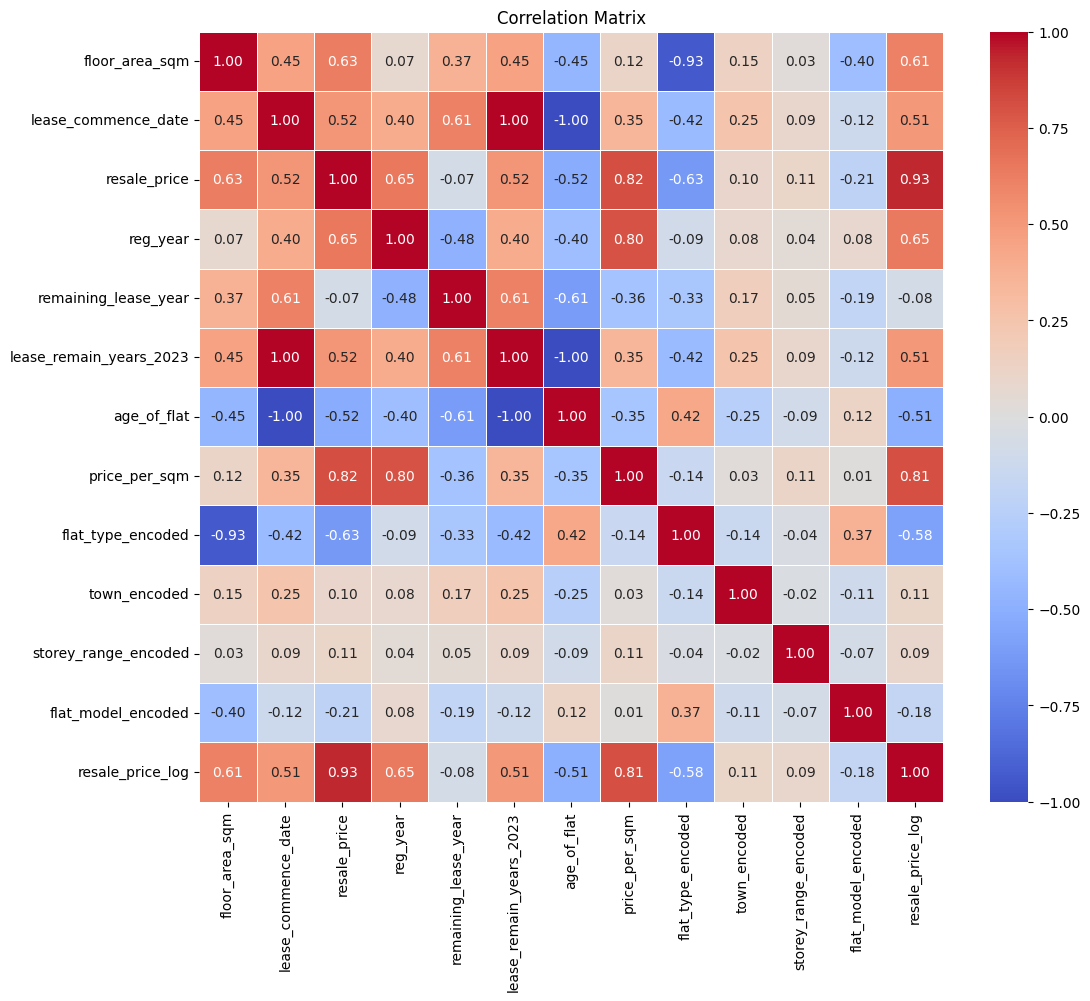

In [97]:
# for model analyzing the correlation of the features
correlation_matrix = numeric_df_no_outliers.corr()
print(correlation_matrix)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


# Correlation Matrix Observations

The provided matrix appears to be a correlation matrix, showing the correlation coefficients between different variables in a dataset.

## Positive Correlations:

- There is a strong positive correlation (0.93) between `resale_price_log` and `resale_price`, indicating a high positive relationship between the logarithm of resale price and resale price itself.
- `resale_price` also shows a strong positive correlation with `floor_area_sqm` (0.63), `reg_year` (0.65), and `price_per_sqm` (0.82). This suggests that larger floor areas, more recent registration years, and higher price per square meter are associated with higher resale prices.

## Negative Correlations:

- There is a moderate negative correlation (-0.51) between `age_of_flat` and `resale_price_log`, indicating that older flats tend to have lower logarithmic resale prices.

## Feature Relationships:

- The variable `floor_area_sqm` has a strong negative correlation with `flat_type_encoded` (-0.93), suggesting that larger floor areas are associated with fewer bedrooms or different flat types.
- `reg_year` and `remaining_lease_year` have a negative correlation (-0.48), indicating that as the registration year increases, the remaining lease years decrease.

## Other Observations:

- `price_per_sqm` has a strong positive correlation with `reg_year` (0.80) and a moderate positive correlation with `floor_area_sqm` (0.12).
- `flat_type_encoded` has a negative correlation with `resale_price` (-0.63), indicating that certain flat types are associated with lower resale prices.


In [98]:
numeric_df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848659 entries, 0 to 912674
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   floor_area_sqm           848659 non-null  float64
 1   lease_commence_date      848659 non-null  float64
 2   resale_price             848659 non-null  float64
 3   reg_year                 848659 non-null  float64
 4   remaining_lease_year     848659 non-null  float64
 5   lease_remain_years_2023  848659 non-null  float64
 6   age_of_flat              848659 non-null  float64
 7   price_per_sqm            848659 non-null  float64
 8   flat_type_encoded        848659 non-null  int64  
 9   town_encoded             848659 non-null  int32  
 10  storey_range_encoded     848659 non-null  int32  
 11  flat_model_encoded       848659 non-null  int32  
 12  resale_price_log         848659 non-null  float64
dtypes: float64(9), int32(3), int64(1)
memory usage: 80.9 MB


# Machine Learning Model
### - Split the data into training and testing sets
### - Initialize and train machine learning models (Linear Regression, Decision Tree, Random Forest)
### - Make predictions on the test set and evaluate model performance using metrics
### - Print the evaluation results for each model



In [99]:
from sklearn.model_selection import train_test_split

# 'X' should contain the features, and 'y' should contain the target variable ('resale_price' or 'resale_price_log')
X = numeric_df_no_outliers.drop(['resale_price', 'resale_price_log','remaining_lease_year','price_per_sqm'], axis=1)  # Features excluding target variable
y = numeric_df_no_outliers['resale_price_log']  # Target variable, you can also use 'resale_price' as the target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train are your training features and target, and X_test and y_test are your testing features and target.

In [100]:
X.columns

Index(['floor_area_sqm', 'lease_commence_date', 'reg_year',
       'lease_remain_years_2023', 'age_of_flat', 'flat_type_encoded',
       'town_encoded', 'storey_range_encoded', 'flat_model_encoded'],
      dtype='object')

In [101]:
X

,floor_area_sqm,lease_commence_date,reg_year,lease_remain_years_2023,age_of_flat,flat_type_encoded,town_encoded,storey_range_encoded,flat_model_encoded
0,-2.537922,-1.089459,-1.732740,-1.089459,1.089459,7,0,5,7
1,-2.537922,-1.089459,-1.732740,-1.089459,1.089459,7,0,2,7
2,-2.537922,-1.089459,-1.732740,-1.089459,1.089459,7,0,5,7
3,-2.537922,-1.089459,-1.732740,-1.089459,1.089459,7,0,4,7
4,-0.877701,-1.192534,-1.732740,-1.192534,1.192534,5,0,2,20
...,...,...,...,...,...,...,...,...,...
912626,1.256868,0.044370,2.028883,0.044370,-0.044370,3,26,5,9
912627,1.256868,0.044370,2.028883,0.044370,-0.044370,3,26,0,9
912658,2.007920,0.044370,2.028883,0.044370,-0.044370,1,26,2,15
912673,1.849804,-0.161781,2.028883,-0.161781,0.161781,1,26,7,5


In [102]:
y

0          9.105091
1          8.699681
2          8.987322
3          8.699681
4         10.762170
            ...    
912626    13.422469
912627    13.437176
912658    13.304687
912673    13.465955
912674    13.480039
Name: resale_price_log, Length: 848659, dtype: float64

In [103]:
X_train

,floor_area_sqm,lease_commence_date,reg_year,lease_remain_years_2023,age_of_flat,flat_type_encoded,town_encoded,storey_range_encoded,flat_model_encoded
592607,0.584874,1.590499,0.433043,1.590499,-1.590499,3,18,7,9
476138,1.335926,0.868972,-0.022912,0.868972,-0.868972,3,17,4,9
813574,0.584874,1.384349,1.686917,1.384349,-1.384349,3,21,2,9
116684,-0.956759,-0.161781,-1.048809,-0.161781,0.161781,5,23,2,20
313238,0.308171,-0.058706,-0.592855,-0.058706,0.058706,4,3,5,16
...,...,...,...,...,...,...,...,...,...
265050,-0.245236,-0.058706,-0.706843,-0.058706,0.058706,4,11,2,26
374144,0.663932,-0.367932,-0.364877,-0.367932,0.367932,4,12,2,16
135172,1.019694,-0.058706,-1.048809,-0.058706,0.058706,3,2,7,7
691334,0.624403,1.487424,0.888997,1.487424,-1.487424,3,13,4,9


In [104]:
preprrocessed_df1=X_train.copy()
# Save the copy to a CSV file
preprrocessed_df1.to_csv('X_train_data.csv', index=False)


## Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Assuming you have already performed the train-test split and have X_train, X_test, y_train, y_test

# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
linear_predictions = linear_model.predict(X_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, linear_predictions)
mse_linear = mean_squared_error(y_test, linear_predictions)
rmse_linear = sqrt(mse_linear)
r2_linear = r2_score(y_test, linear_predictions)

# Print results
print("Linear Regression Metrics:")
print("Mean Absolute Error:", mae_linear)
print("Mean Squared Error:", mse_linear)
print("Root Mean Squared Error:", rmse_linear)
print("R^2 Score:", r2_linear)


Linear Regression Metrics:
Mean Absolute Error: 0.22087360761633543
Mean Squared Error: 0.08815262775142445
Root Mean Squared Error: 0.2969050820572535
R^2 Score: 0.7425264003484037


## DecisionTreeRegressor

In [106]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Assuming you have already performed the train-test split and have X_train, X_test, y_train, y_test

# Initialize the decision tree regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, decision_tree_predictions)
mse_dt = mean_squared_error(y_test, decision_tree_predictions)
rmse_dt = sqrt(mse_dt)
r2_dt = r2_score(y_test, decision_tree_predictions)

# Print results
print("\nDecision Tree Regression Metrics:")
print("Mean Absolute Error:", mae_dt)
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)
print("R^2 Score:", r2_dt)



Decision Tree Regression Metrics:
Mean Absolute Error: 0.07278896636003843
Mean Squared Error: 0.011430795551582836
Root Mean Squared Error: 0.10691489864178348
R^2 Score: 0.9666132689107508


## RandomForestRegressor

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Assuming you have already performed the train-test split and have X_train, X_test, y_train, y_test

# Initialize the random forest regression model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, random_forest_predictions)
mse_rf = mean_squared_error(y_test, random_forest_predictions)
rmse_rf = sqrt(mse_rf)
r2_rf = r2_score(y_test, random_forest_predictions)

# Print results
print("\nRandom Forest Regression Metrics:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R^2 Score:", r2_rf)



Random Forest Regression Metrics:
Mean Absolute Error: 0.06736025945227461
Mean Squared Error: 0.009579626475533143
Root Mean Squared Error: 0.09787556628461029
R^2 Score: 0.9720201090439599


# Model Comparison: Linear Regression vs. Decision Tree Regression vs. Random Forest Regression
## Observations:

### Error Metrics:

Random Forest Regression has the lowest MAE, MSE, and RMSE, indicating superior predictive performance.
Decision Tree Regression outperforms Linear Regression across all metrics.
R^2 Score:

Random Forest Regression has the highest R^2 score, indicating its ability to explain a greater proportion of the variance in the target variable.
Decision Tree Regression also shows excellent performance, surpassing Linear Regression.

### Conclusion:

Among the three models, Random Forest Regression demonstrates the highest accuracy and predictive power. It outperforms both Linear Regression and Decision Tree Regression, making it the preferred model for this task. Consider deploying the Random Forest model for making predictions on new data.

## Visualization of Model Predictions

## Linear Regression Model:

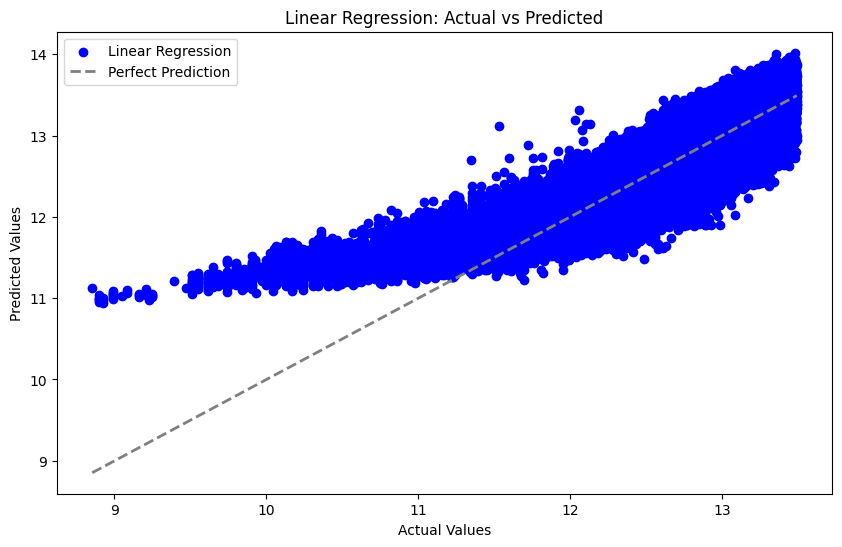

In [108]:
# Visualize Linear Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2, label='Perfect Prediction')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Decision Tree Regression Model:

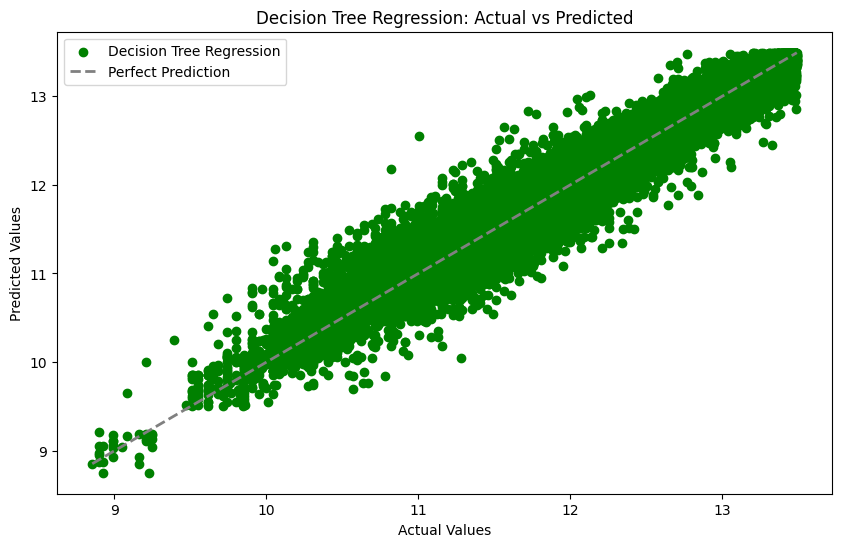

In [109]:
# Visualize Decision Tree Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, decision_tree_predictions, color='green', label='Decision Tree Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2, label='Perfect Prediction')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


## Random Forest Regression Model:

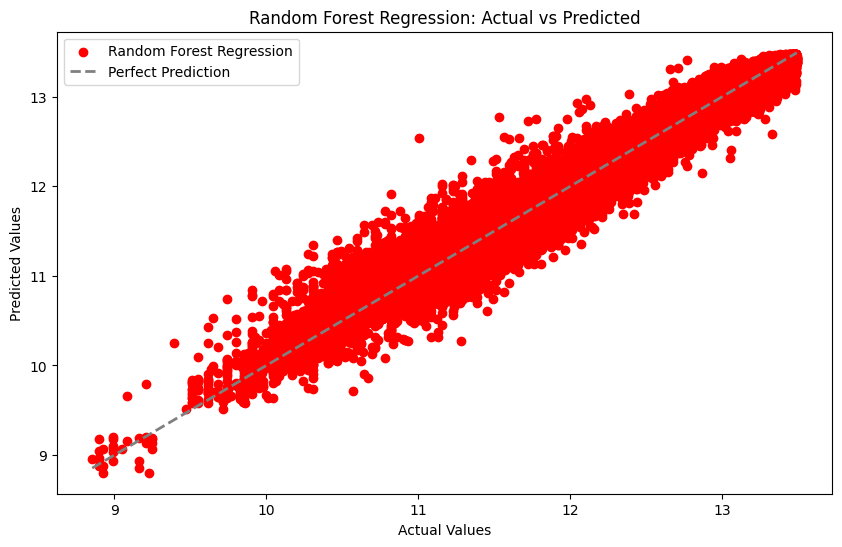

In [110]:
# Visualize Random Forest Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, random_forest_predictions, color='red', label='Random Forest Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2, label='Perfect Prediction')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

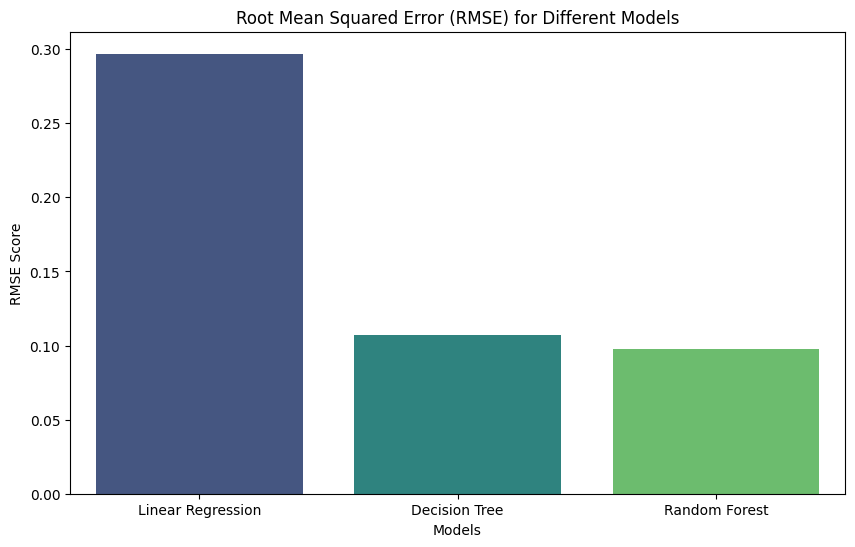

In [111]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
rmse_scores = [rmse_linear, rmse_dt, rmse_rf]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_scores, palette='viridis')
plt.title('Root Mean Squared Error (RMSE) for Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.show()

# Hyper Parameter Tuning:

## Decision Tree Hyperparameter Tuning and Evaluation

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Decision Tree Hyperparameter Tuning
dt_param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Best hyperparameters
best_dt_params = dt_grid_search.best_params_

# Cross-validated RMSE with best hyperparameters
dt_cv_rmse = np.sqrt(-dt_grid_search.best_score_)

# Evaluate the best Decision Tree model on the test set
best_dt_model = dt_grid_search.best_estimator_
best_dt_predictions = best_dt_model.predict(X_test)
best_dt_mae = mean_absolute_error(y_test, best_dt_predictions)
best_dt_mse = mean_squared_error(y_test, best_dt_predictions)
best_dt_rmse = sqrt(best_dt_mse)
best_dt_r2 = r2_score(y_test, best_dt_predictions)

# Print results
print("\nBest Decision Tree Model:")
print("Best Hyperparameters:", best_dt_params)
print("Cross-Validated RMSE:", dt_cv_rmse)
print("Test Set Metrics:")
print("Mean Absolute Error:", best_dt_mae)
print("Mean Squared Error:", best_dt_mse)
print("Root Mean Squared Error:", best_dt_rmse)
print("R^2 Score:", best_dt_r2)



Best Decision Tree Model:
Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10}
Cross-Validated RMSE: 0.10109348185989096
Test Set Metrics:
Mean Absolute Error: 0.06860491099118983
Mean Squared Error: 0.009838142723490302
Root Mean Squared Error: 0.09918741212215541
R^2 Score: 0.9712650423984408


## Decision Tree Regression Model after Hyper parameter Tuning:

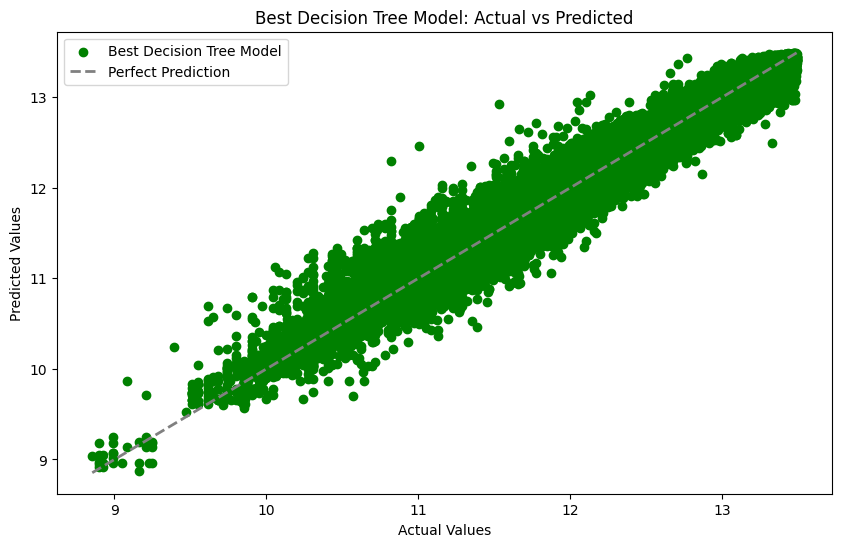

In [113]:
# Visualize Decision Tree Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_dt_predictions, color='green', label='Best Decision Tree Model')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2, label='Perfect Prediction')
plt.title('Best Decision Tree Model: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


## Random Forest Regressor Hyperparameter Tuning and Evaluation

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Define a simplified hyperparameter grid
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random Forest Hyperparameter Tuning
rf_grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the grid search to the training data
rf_grid_search.fit(X_train, y_train)

# Extract best hyperparameters and cross-validated RMSE
best_rf_params = rf_grid_search.best_params_
rf_cv_rmse = np.sqrt(-rf_grid_search.best_score_)

# Evaluate the best Random Forest model on the test set
best_rf_model = rf_grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)

# Calculate metrics
best_rf_mae = mean_absolute_error(y_test, best_rf_predictions)
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
best_rf_rmse = sqrt(best_rf_mse)
best_rf_r2 = r2_score(y_test, best_rf_predictions)

# Print results
print("\nBest Random Forest Model:")
print("Best Hyperparameters:", best_rf_params)
print("Cross-Validated RMSE:", rf_cv_rmse)
print("Test Set Metrics:")
print("Mean Absolute Error:", best_rf_mae)
print("Mean Squared Error:", best_rf_mse)
print("Root Mean Squared Error:", best_rf_rmse)
print("R^2 Score:", best_rf_r2)



Best Random Forest Model:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Cross-Validated RMSE: 0.09625678763756351
Test Set Metrics:
Mean Absolute Error: 0.06576749943254591
Mean Squared Error: 0.009047610372362798
Root Mean Squared Error: 0.09511892751898961
R^2 Score: 0.9735740060139078


## Random Forest Regressor Model after Hyper parameter Tuning:

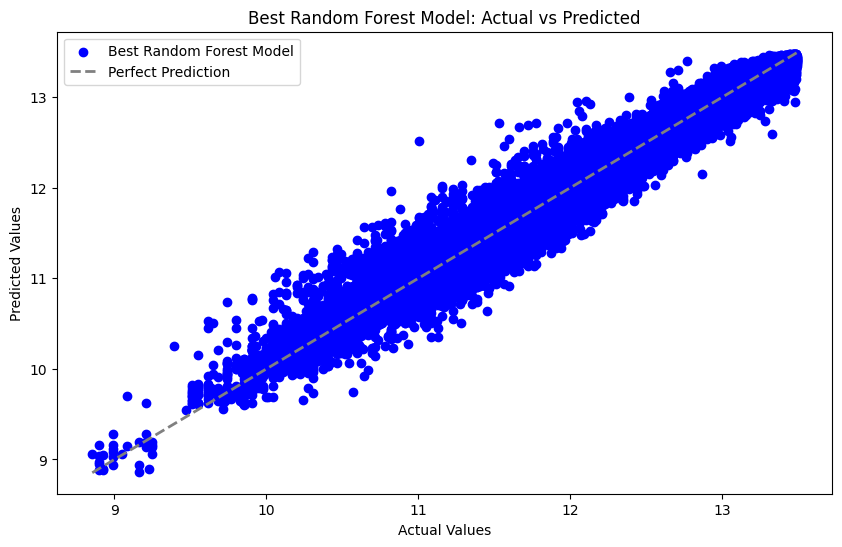

In [115]:
# Visualize Random Forest Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_rf_predictions, color='blue', label='Best Random Forest Model')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2, label='Perfect Prediction')
plt.title('Best Random Forest Model: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


# Observations after hyper parameter tuning of model:
## Comparison of Models:

Both Decision Tree and Random Forest models perform exceptionally well.
Random Forest shows a slightly lower Cross-Validated RMSE, indicating improved generalization.

## Hyperparameter Insights:

Decision Tree: 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10
Random Forest: 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100
Random Forest introduces more complexity with additional hyperparameters.

##Test Set Performance:

Both models exhibit low errors (MAE, MSE, RMSE) and high R^2 scores on the test set.
Random Forest slightly outperforms Decision Tree in terms of RMSE.
Conclusions:

## Model Selection:

Both models are strong contenders.
Random Forest, with a slightly lower RMSE and comparable R^2, may be preferred for better generalization.

## Hyperparameter Choices:

Decision Tree's hyperparameters suggest controlling overfitting with limited depth and samples in leaf nodes.
Random Forest introduces ensemble learning, potentially capturing more complex relationships.

# Model Testing

In [116]:
# Sample random values for testing
new_data = pd.DataFrame({
    'floor_area_sqm': [-2.5],  # Sample value
    'lease_commence_date': [-1.0],  # Sample value
    'reg_year': [-1.7],  # Sample value
    'lease_remain_years_2023': [-1.0],  # Sample value
    'age_of_flat': [1.0],  # Sample value
    'flat_type_encoded': [7],  # Sample value
    'town_encoded': [0],  # Sample value
    'storey_range_encoded': [2],  # Sample value
    'flat_model_encoded': [7]  # Sample value
})

In [117]:
from sklearn.preprocessing import StandardScaler

# Use the same scaler as used for training data
scaler = StandardScaler()
scaled_new_data = scaler.fit_transform(new_data)

In [118]:
# Assume best_rf_model is the trained Random Forest model
new_data_predictions = best_rf_model.predict(scaled_new_data)

# Print predictions
print("Predicted Prices:", new_data_predictions)


Predicted Prices: [12.67592464]


C:\Users\DIVAHAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [119]:
# Assume best_dt_model is the trained Random Forest model
new_data_predictions = best_dt_model.predict(scaled_new_data)

# Print predictions
print("Predicted Prices:", new_data_predictions)


Predicted Prices: [12.43881358]


C:\Users\DIVAHAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# Exporting the model for future use

In [120]:
import pickle

# Save trained model
with open('best_rf_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)


In [122]:
# Print the type of best_rf_model
print(type(best_rf_model))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [121]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Associate feature importances with corresponding feature names
feature_names = X_train.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
                   Feature  Importance
2                 reg_year    0.572992
0           floor_area_sqm    0.248854
5        flat_type_encoded    0.126588
6             town_encoded    0.028973
8       flat_model_encoded    0.005603
4              age_of_flat    0.004818
7     storey_range_encoded    0.004432
3  lease_remain_years_2023    0.003876
1      lease_commence_date    0.003864
